<a href="https://colab.research.google.com/github/abhaydubey200/Second_Project-_Price_prediction_model/blob/main/Price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Step : Import All Librarys for

1. data cleaning

2. EDA & visualization

3. time-series ML

4. XGBoost

5. evaluation metrics

In [3]:

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# STEP 2: LOAD ALL DATASETS

In [4]:
file_path = "Small Cardamom Auction Average Price 2014-2025..xlsx"
xls = pd.ExcelFile(file_path)

print("Sheets found:", xls.sheet_names)

dfs = {sheet: xls.parse(sheet) for sheet in xls.sheet_names}

df_qs  = dfs['GC-LP-QS']
df_lp  = dfs['GC-LP']
df_prd = dfs['Global Prdn.']

print("\nGC-LP-QS Sheet:")
display(df_qs.head())

print("\nGC-LP Sheet:")
display(df_lp.head())

print("\nGlobal Prdn Sheet:")
display(df_prd.head())

Sheets found: ['GC-LP-QS', 'GC-LP', 'Global Prdn.']

GC-LP-QS Sheet:


,Date of Auction,Qty Sold (Kgs),Avg.Price (Rs./Kg)
0,2025-10-29,101810.3,2503.80
1,2025-10-29,21767.9,2467.68
2,2025-10-28,84888.1,2464.22
3,2025-10-28,90880.9,2479.12
4,2025-10-27,79737.1,2466.66



GC-LP Sheet:


,Date of Auction,Avg.Price (Rs./Kg)
0,2025-06-05,2260.99
1,2025-06-05,2343.76
2,2025-06-04,2441.39
3,2025-06-04,2444.10
4,2025-06-03,2400.50



Global Prdn Sheet:


,Country,2020-21,2021-22,2022-23,2023-24,2024-25,2025-26
0,India,22.5,23.3,24.5,25.2,17.7,30.0
1,Gautemala,66.5,53.0,52.0,36.8,18.8,25.3
2,Indonesia,12.0,10.5,40.6,21.3,21.0,19.9
3,Laos,0.1,1.5,3.1,2.5,2.2,2.4
4,Vietnam,0.8,2.0,3.6,2.5,2.0,1.8


In [5]:
file_2 = "data (32).xls.xlsx"

df2 = pd.read_excel(file_2)
df2.head()

,Year,Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sept.,Oct.,Nov.,Dec.,Annual
0,1901,28.7,44.7,51.6,159.9,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.5
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.5
2,1903,3.1,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.0,157.0,59.0,3271.1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.6
4,1905,1.2,22.3,9.3,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.5


# Now We are going understand data and data cleaning
. we are working on df2(data(32))

In [6]:
print(f"The Number of Rows are {df2.shape[0]}, and columns are {df2.shape[1]}.")

The Number of Rows are 128, and columns are 14.


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    127 non-null    object 
 1   Jan.    125 non-null    float64
 2   Feb.    125 non-null    float64
 3   Mar.    125 non-null    float64
 4   Apr.    125 non-null    float64
 5   May     125 non-null    float64
 6   Jun.    125 non-null    float64
 7   Jul.    125 non-null    float64
 8   Aug.    125 non-null    float64
 9   Sept.   125 non-null    float64
 10  Oct.    124 non-null    float64
 11  Nov.    124 non-null    float64
 12  Dec.    124 non-null    float64
 13  Annual  124 non-null    float64
dtypes: float64(13), object(1)
memory usage: 14.1+ KB


In [8]:
df2.isnull().sum()

,0
Year,1
Jan.,3
Feb.,3
Mar.,3
Apr.,3
May,3
Jun.,3
Jul.,3
Aug.,3
Sept.,3


In [9]:
df2.fillna({
    **df2.select_dtypes('number').mean().to_dict(),
    **df2.select_dtypes('object').mode().iloc[0].to_dict()
}, inplace=True)

In [10]:
df2.isnull().sum()

,0
Year,0
Jan.,0
Feb.,0
Mar.,0
Apr.,0
May,0
Jun.,0
Jul.,0
Aug.,0
Sept.,0


In [11]:
df2.describe()

,Jan.,Feb.,Mar.,Apr.,May,Jun.,Jul.,Aug.,Sept.,Oct.,Nov.,Dec.,Annual
count,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,12.988000,14.901600,37.25360,109.942400,238.156000,641.061600,689.056800,425.173600,249.859200,294.484677,163.901613,41.252419,2917.091129
std,17.501499,15.669274,29.33758,44.495275,151.545729,186.538412,218.591527,167.657802,125.456002,96.568845,83.258081,36.284828,424.085766
min,0.000000,0.100000,0.10000,13.100000,53.400000,196.400000,167.500000,60.000000,41.300000,68.500000,31.400000,0.100000,1870.900000
25%,2.400000,4.600000,18.17500,75.300000,127.875000,535.450000,542.725000,315.675000,156.250000,223.475000,97.375000,11.825000,2631.250000
50%,6.400000,8.500000,29.70000,109.942400,198.750000,623.300000,676.900000,397.100000,230.150000,287.500000,153.400000,33.350000,2920.045565
75%,16.750000,20.875000,49.62500,135.250000,296.575000,771.700000,828.575000,499.700000,333.700000,353.775000,216.475000,55.325000,3136.475000
max,105.500000,79.000000,218.90000,237.400000,738.800000,1098.200000,1526.500000,1199.200000,601.900000,589.500000,394.500000,202.300000,4257.800000


In [12]:
# Find duplicate rows............
df2.duplicated().sum()

np.int64(0)

In [13]:
df2.columns

Index(['Year', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.',
       'Sept.', 'Oct.', 'Nov.', 'Dec.', 'Annual'],
      dtype='object')

In [14]:
# Convert dates
df2['Year'] = pd.to_datetime(df2['Year'], errors='coerce')

In [15]:
# Clean column names (remove dots)
df2.columns = df2.columns.str.replace(".", "", regex=False).str.strip()

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    126 non-null    datetime64[ns]
 1   Jan     128 non-null    float64       
 2   Feb     128 non-null    float64       
 3   Mar     128 non-null    float64       
 4   Apr     128 non-null    float64       
 5   May     128 non-null    float64       
 6   Jun     128 non-null    float64       
 7   Jul     128 non-null    float64       
 8   Aug     128 non-null    float64       
 9   Sept    128 non-null    float64       
 10  Oct     128 non-null    float64       
 11  Nov     128 non-null    float64       
 12  Dec     128 non-null    float64       
 13  Annual  128 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 14.1 KB


# Now work on second dataset(Small Cardamom Auction Average Price 2014-2025..xlsx) cleaning
.Sheet 1


In [17]:
df_qs.head()

,Date of Auction,Qty Sold (Kgs),Avg.Price (Rs./Kg)
0,2025-10-29,101810.3,2503.80
1,2025-10-29,21767.9,2467.68
2,2025-10-28,84888.1,2464.22
3,2025-10-28,90880.9,2479.12
4,2025-10-27,79737.1,2466.66


In [18]:
df_qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5277 entries, 0 to 5276
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date of Auction     5277 non-null   datetime64[ns]
 1   Qty Sold (Kgs)      5277 non-null   float64       
 2   Avg.Price (Rs./Kg)  5277 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 123.8 KB


In [19]:
df_qs.isnull().sum()

,0
Date of Auction,0
Qty Sold (Kgs),0
Avg.Price (Rs./Kg),0


In [20]:
print(f"The Number of Rows are {df_qs.shape[0]}, and columns are {df_qs.shape[1]}.")

The Number of Rows are 5277, and columns are 3.


In [21]:
df_qs.describe()

,Date of Auction,Qty Sold (Kgs),Avg.Price (Rs./Kg)
count,5277,5277.000000,5277.000000
mean,2020-09-14 07:25:04.263786240,49037.117197,1499.024567
min,2015-01-14 00:00:00,1832.300000,481.770000
25%,2017-10-03 00:00:00,29469.900000,916.230000
50%,2020-12-08 00:00:00,47413.000000,1220.890000
75%,2023-07-12 00:00:00,64591.900000,2071.310000
max,2025-10-29 00:00:00,208593.000000,4733.190000
std,NaN,25615.713715,793.125197


.Sheet 2

In [22]:
df_lp.head()

,Date of Auction,Avg.Price (Rs./Kg)
0,2025-06-05,2260.99
1,2025-06-05,2343.76
2,2025-06-04,2441.39
3,2025-06-04,2444.10
4,2025-06-03,2400.50


In [23]:
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date of Auction     5046 non-null   datetime64[ns]
 1   Avg.Price (Rs./Kg)  5046 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 79.0 KB


In [24]:
df_lp.isnull().sum()

,0
Date of Auction,0
Avg.Price (Rs./Kg),0


In [25]:
print(f"The Number of Rows are {df_lp.shape[0]}, and columns are {df_lp.shape[1]}.")

The Number of Rows are 5046, and columns are 2.


In [26]:
df_lp.describe()

,Date of Auction,Avg.Price (Rs./Kg)
count,5046,5046.000000
mean,2020-06-23 02:55:47.443519744,1451.827202
min,2014-11-07 00:00:00,0.000000
25%,2017-08-25 00:00:00,908.482500
50%,2020-09-21 12:00:00,1167.155000
75%,2023-03-18 00:00:00,1758.012500
max,2025-06-05 00:00:00,4733.190000
std,NaN,779.722578


.Sheet 3

In [27]:
df_prd.head()

,Country,2020-21,2021-22,2022-23,2023-24,2024-25,2025-26
0,India,22.5,23.3,24.5,25.2,17.7,30.0
1,Gautemala,66.5,53.0,52.0,36.8,18.8,25.3
2,Indonesia,12.0,10.5,40.6,21.3,21.0,19.9
3,Laos,0.1,1.5,3.1,2.5,2.2,2.4
4,Vietnam,0.8,2.0,3.6,2.5,2.0,1.8


In [28]:
df_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  6 non-null      object 
 1   2020-21  6 non-null      float64
 2   2021-22  6 non-null      float64
 3   2022-23  6 non-null      float64
 4   2023-24  6 non-null      float64
 5   2024-25  6 non-null      float64
 6   2025-26  6 non-null      float64
dtypes: float64(6), object(1)
memory usage: 468.0+ bytes


In [29]:
print(f"The Number of Rows are {df_prd.shape[0]}, and columns are {df_prd.shape[1]}.")

The Number of Rows are 6, and columns are 7.


In [30]:
df_prd.isnull().sum()

,0
Country,0
2020-21,0
2021-22,0
2022-23,0
2023-24,0
2024-25,0
2025-26,0


In [31]:
df_prd.describe()

,2020-21,2021-22,2022-23,2023-24,2024-25,2025-26
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,16.991667,15.066667,20.733333,14.850000,10.450000,13.40000
std,25.848993,20.524977,21.892069,15.053073,9.616184,13.18135
min,0.050000,0.100000,0.600000,0.800000,1.000000,1.00000
25%,0.275000,1.625000,3.225000,2.500000,2.050000,1.95000
50%,6.400000,6.250000,14.050000,11.900000,9.950000,11.15000
75%,19.875000,20.100000,36.575000,24.225000,18.525000,23.95000
max,66.500000,53.000000,52.000000,36.800000,21.000000,30.00000


EDA — Sheet 1: GC-LP-QS


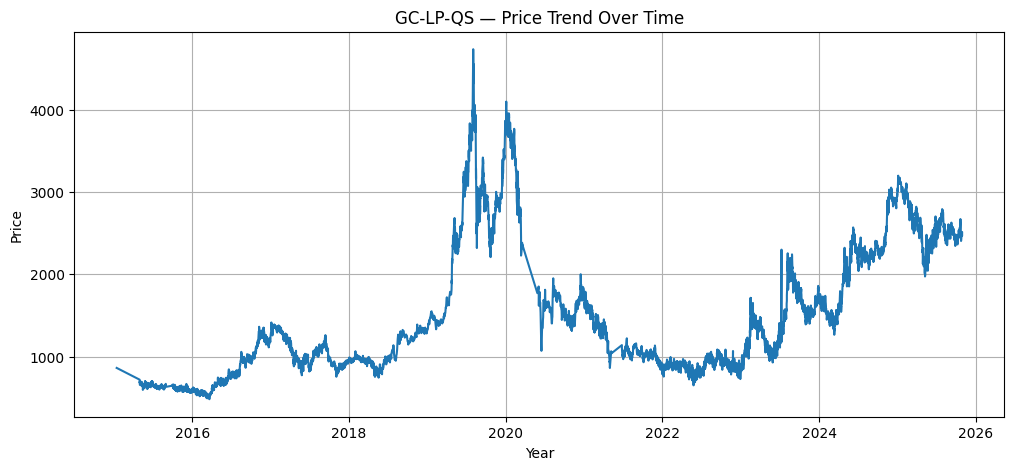

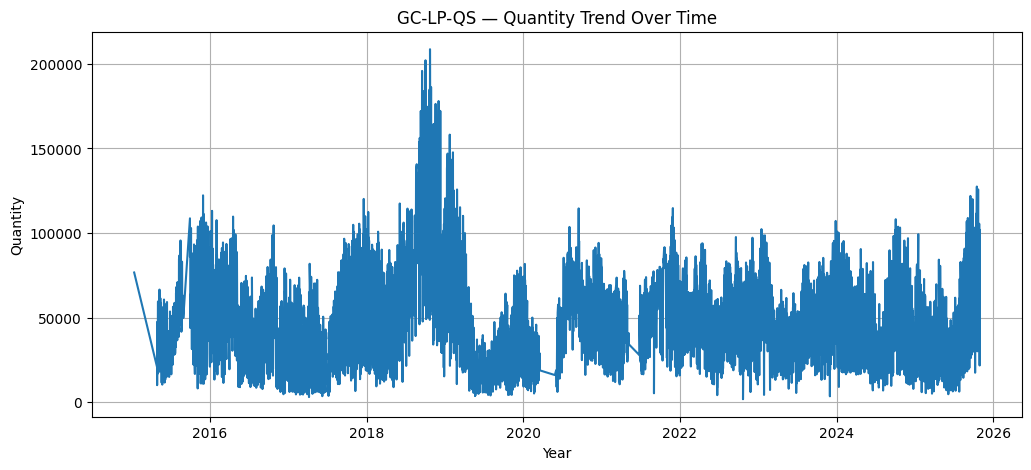

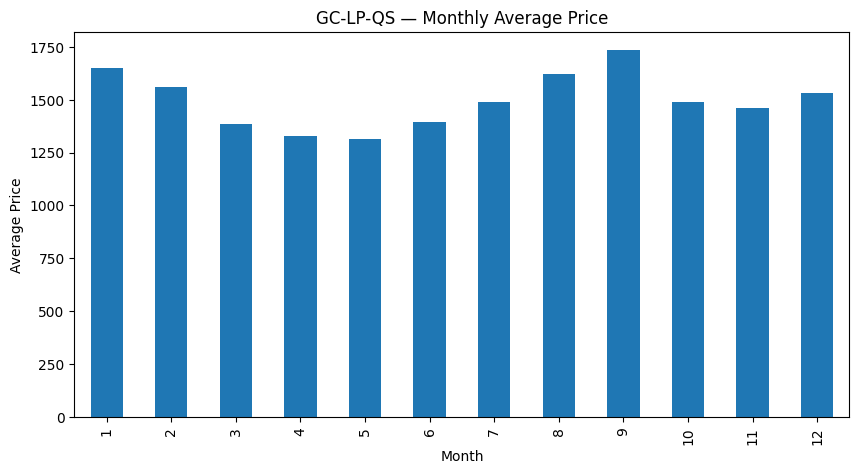

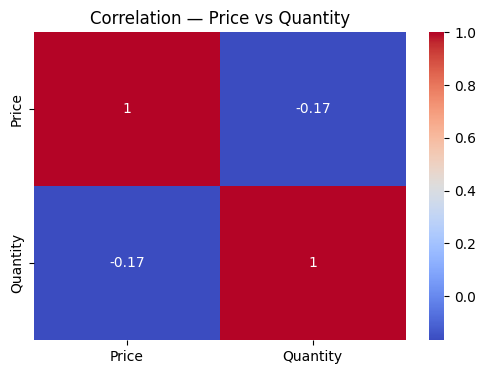

In [32]:
print("EDA — Sheet 1: GC-LP-QS")

# Correct column names and convert to datetime
df_qs['Date'] = pd.to_datetime(df_qs['Date of Auction'])
df_qs.rename(columns={'Avg.Price (Rs./Kg)': 'Price', 'Qty Sold (Kgs)': 'Quantity'}, inplace=True)

# Price Trend
plt.figure(figsize=(12,5))
plt.plot(df_qs['Date'], df_qs['Price'])
plt.title("GC-LP-QS — Price Trend Over Time")
plt.xlabel("Year"); plt.ylabel("Price"); plt.grid(True)
plt.show()
print("\n")


# Quantity Trend
plt.figure(figsize=(12,5))
plt.plot(df_qs['Date'], df_qs['Quantity'])
plt.title("GC-LP-QS — Quantity Trend Over Time")
plt.xlabel("Year"); plt.ylabel("Quantity"); plt.grid(True)
plt.show()
print("\n")

# Seasonality
df_qs['Month'] = df_qs['Date'].dt.month
qs_monthly = df_qs.groupby('Month')['Price'].mean()

plt.figure(figsize=(10,5))
qs_monthly.plot(kind='bar')
plt.title("GC-LP-QS — Monthly Average Price")
plt.xlabel("Month"); plt.ylabel("Average Price")
plt.show()
print("\n")

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_qs[['Price', 'Quantity']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation — Price vs Quantity")
plt.show()

In [33]:
df_lp.columns

Index(['Date of Auction', 'Avg.Price (Rs./Kg)'], dtype='object')

EDA — Sheet 2: GC-LP


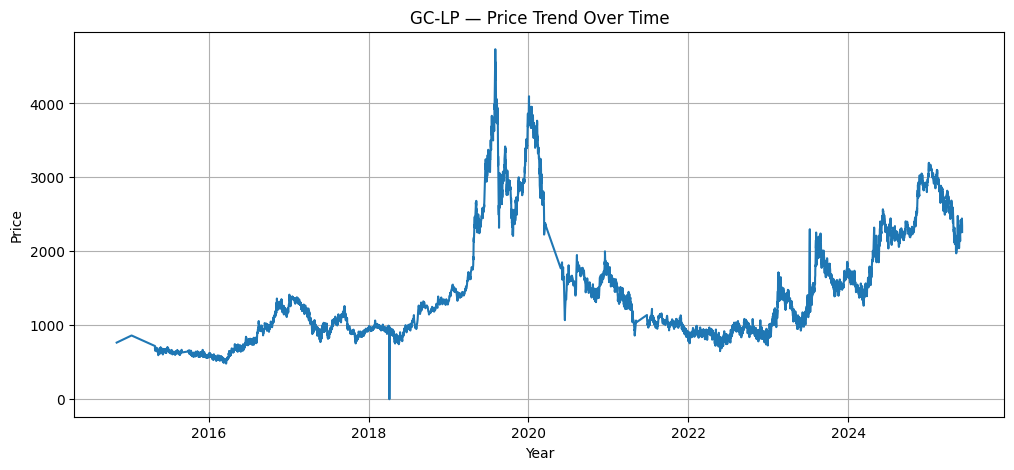

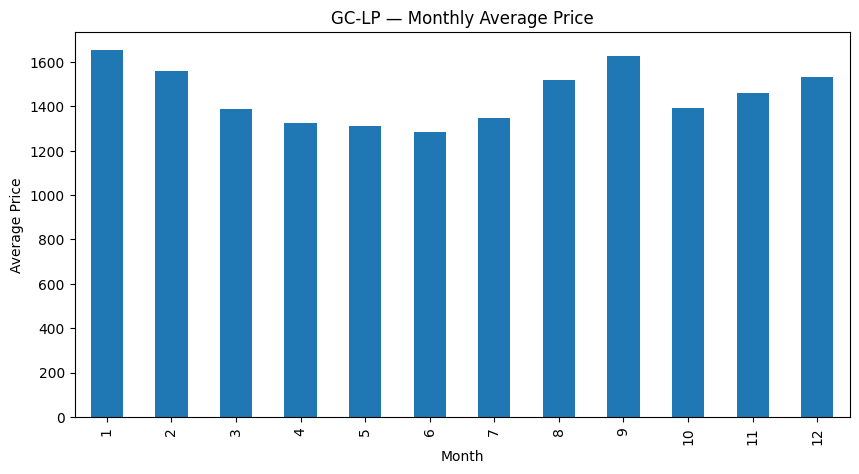

In [34]:
print("EDA — Sheet 2: GC-LP")

# Price Trend
plt.figure(figsize=(12,5))
plt.plot(df_lp['Date of Auction'], df_lp['Avg.Price (Rs./Kg)'])
plt.title("GC-LP — Price Trend Over Time")
plt.xlabel("Year"); plt.ylabel("Price"); plt.grid(True)
plt.show()
print("\n")

# Seasonality
df_lp['Month'] = df_lp['Date of Auction'].dt.month
lp_monthly = df_lp.groupby('Month')['Avg.Price (Rs./Kg)'].mean()

plt.figure(figsize=(10,5))
lp_monthly.plot(kind='bar')
plt.title("GC-LP — Monthly Average Price")
plt.xlabel("Month"); plt.ylabel("Average Price")
plt.show()
print("\n")

 EDA — Sheet 3: Global Prdn.


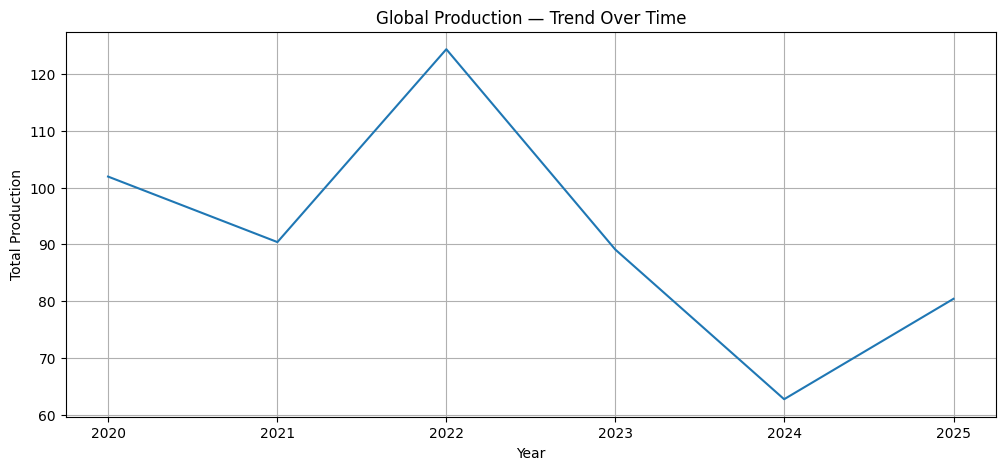

In [35]:
print(" EDA — Sheet 3: Global Prdn.")

# Reshape df_prd for plotting as it has years as columns
df_prd_melted = df_prd.melt(id_vars=['Country'], var_name='Year_Range', value_name='Production')
# Extract the starting year from the 'Year_Range' string (e.g., '2020-21' -> 2020)
df_prd_melted['Year_Num'] = df_prd_melted['Year_Range'].apply(lambda x: int(x.split('-')[0]))
# Create a datetime object for plotting
df_prd_melted['Date'] = pd.to_datetime(df_prd_melted['Year_Num'], format='%Y')

# Production Trend
plt.figure(figsize=(12,5))
yearly_production = df_prd_melted.groupby('Date')['Production'].sum().reset_index()
plt.plot(yearly_production['Date'], yearly_production['Production'])
plt.title("Global Production — Trend Over Time")
plt.xlabel("Year"); plt.ylabel("Total Production")
plt.grid(True)
plt.show()

# Now we are working on second dataset EDA

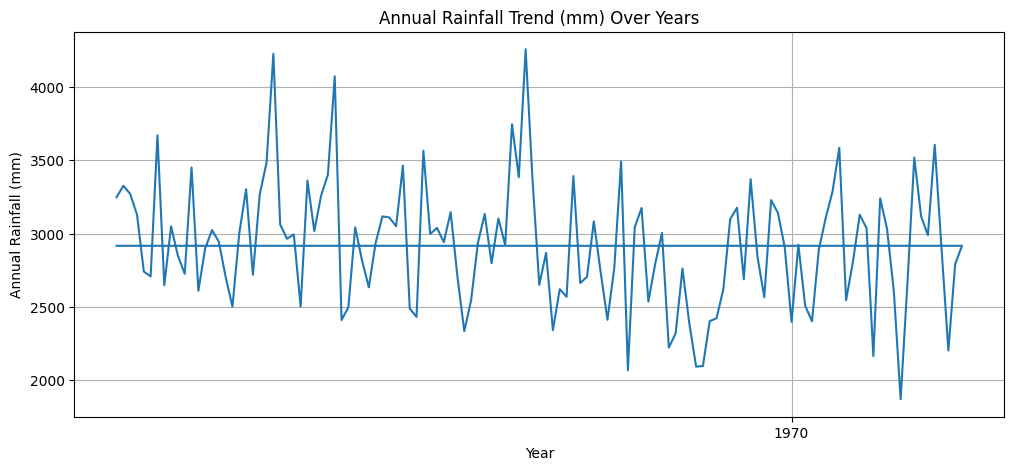

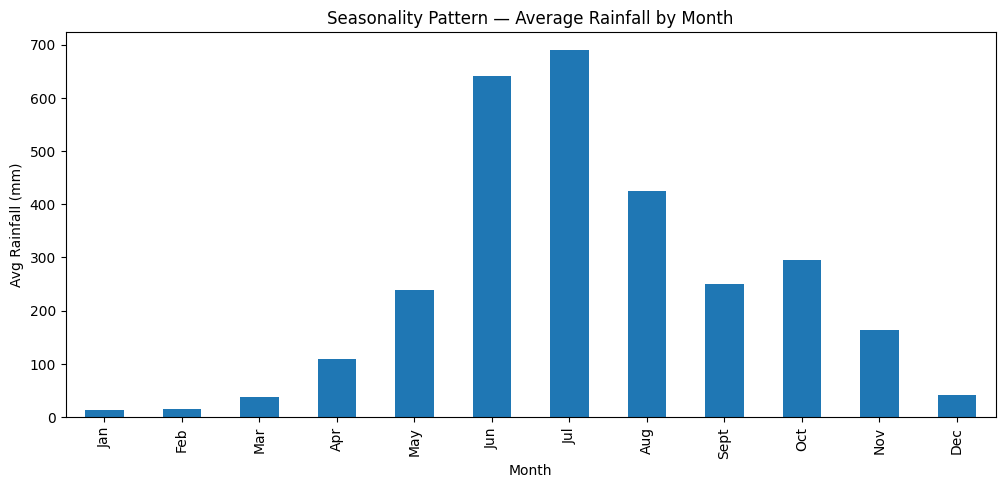

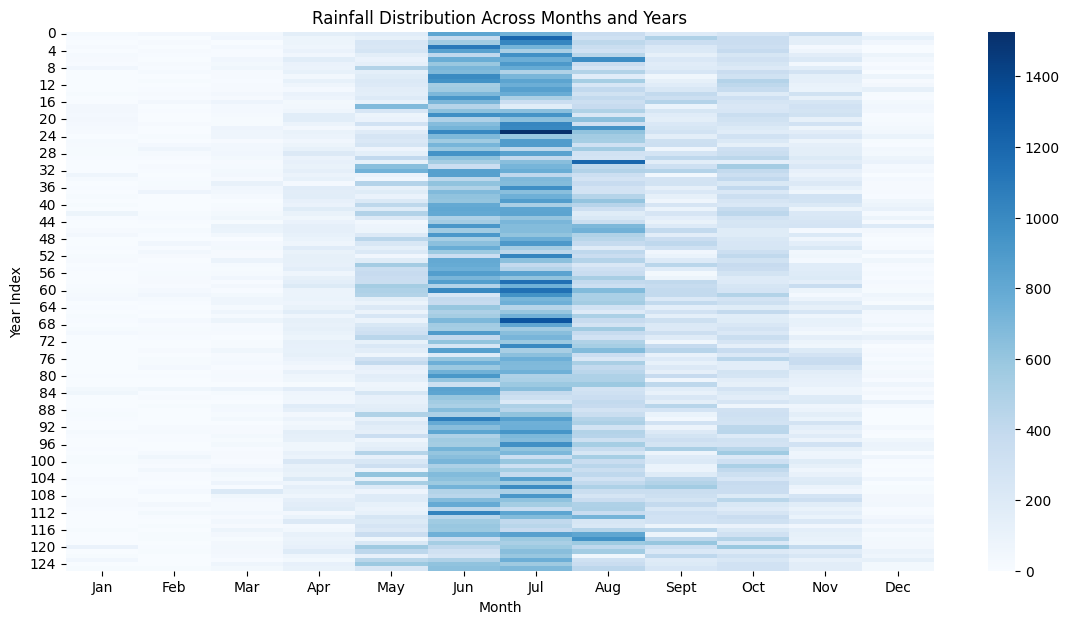

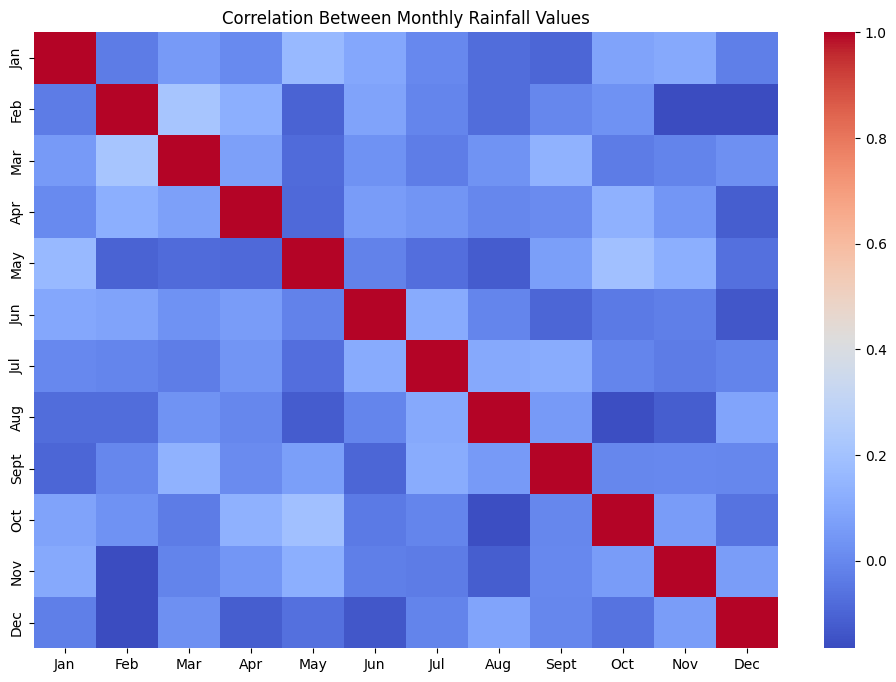

In [36]:
# Trend of Annual Rainfall over the Years...........

df2.dropna(subset=['Year'], inplace=True)

plt.figure(figsize=(12,5))
plt.plot(df2['Year'], df2['Annual'])
plt.title("Annual Rainfall Trend (mm) Over Years")
plt.xlabel("Year"); plt.ylabel("Annual Rainfall (mm)")
plt.grid(True)
plt.show()
print("\n")


# Monthly Average Rainfall (Seasonality).........
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

monthly_avg = df2[months].mean()

plt.figure(figsize=(12,5))
monthly_avg.plot(kind='bar')
plt.title("Seasonality Pattern — Average Rainfall by Month")
plt.xlabel("Month"); plt.ylabel("Avg Rainfall (mm)")
plt.show()
print("\n")

# Heatmap — Year vs Month (Rainfall Distribution)........

plt.figure(figsize=(14,7))
sns.heatmap(df2[months], cmap="Blues")
plt.title("Rainfall Distribution Across Months and Years")
plt.xlabel("Month"); plt.ylabel("Year Index")
plt.show()
print("\n")

# Correlation between all months.........
plt.figure(figsize=(12,8))
sns.heatmap(df2[months].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Between Monthly Rainfall Values")
plt.show()

# Convert Rainfall dataset to long forma(Data Transform), This for dataset 2 data(32)..

In [37]:
df2['Year'] = df2['Year'].astype(str).str[-4:].astype(int)

# Define the monthly columns explicitly
months_to_melt = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

rainfall_long = df2.melt(
    id_vars=['Year'],
    value_vars=months_to_melt, # Explicitly specify monthly columns to melt
    var_name='Month',
    value_name='Rainfall'
)

# The previous replace for '.' in 'Month' is still valid, as it handles 'Jan.' to 'Jan' etc.
rainfall_long['Month'] = rainfall_long['Month'].str.replace('.', '', regex=False).str.strip()

print("Processed Monthly Rainfall Data:")
display(rainfall_long.head())
print("\nShape:", rainfall_long.shape)

Processed Monthly Rainfall Data:


,Year,Month,Rainfall
0,1901,Jan,28.7
1,1902,Jan,6.7
2,1903,Jan,3.1
3,1904,Jan,23.7
4,1905,Jan,1.2



Shape: (1512, 3)


In [38]:
# Create a month mapping dictionary......
month_map = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
    "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
    "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

In [39]:
# Convert month name to month number............
rainfall_long["Month_Num"] = rainfall_long["Month"].map(month_map)

In [40]:
# Create final year_month key.........
rainfall_long["year_month"] = rainfall_long["Year"].astype(str) + "-" + rainfall_long["Month_Num"]

In [41]:
# Final clean rainfall dataset...........
df_rain_final = rainfall_long[["year_month", "Year", "Month", "Rainfall"]]
df_rain_final.head()

,year_month,Year,Month,Rainfall
0,1901-01,1901,Jan,28.7
1,1902-01,1902,Jan,6.7
2,1903-01,1903,Jan,3.1
3,1904-01,1904,Jan,23.7
4,1905-01,1905,Jan,1.2


# Data Transform for DataSet1's All 3 Sheets (Small Cardamom Auction Average Price 2014-2025.)

 For each sheet: Convert month + year into year_month.....

In [43]:
month_map = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
    "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
    "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

# 1. QS SHEET
# Ensure 'Date of Auction' is datetime, then extract Year and Month_Num
df_qs["Date of Auction"] = pd.to_datetime(df_qs["Date of Auction"], errors="coerce")
df_qs["Year"] = df_qs["Date of Auction"].dt.year
df_qs["Month_Num"] = df_qs["Date of Auction"].dt.month
df_qs["year_month"] = df_qs["Year"].astype(str) + "-" + df_qs["Month_Num"].astype(str).str.zfill(2)
print("\n ---QS Sheet After Transformation")
print(df_qs.head())
print("\n")

# 2. LP SHEET
# Ensure 'Date of Auction' is datetime, then extract Year and Month_Num
df_lp["Date of Auction"] = pd.to_datetime(df_lp["Date of Auction"], errors="coerce")
df_lp["Year"] = df_lp["Date of Auction"].dt.year
df_lp["Month_Num"] = df_lp["Date of Auction"].dt.month
df_lp["year_month"] = df_lp["Year"].astype(str) + "-" + df_lp["Month_Num"].astype(str).str.zfill(2)
print("\n ---LP Sheet After Transformation")
print(df_lp.head())
print("\n")


# 3. PRODUCTION SHEET (ANNUAL)

df_prod_long = df_prd.melt(id_vars=["Country"],
                            var_name="Year_Range",
                            value_name="Production")
print("\n ---Prd Sheet After Transformation")
print(df_prd.head())


 ---QS Sheet After Transformation
  Date of Auction  Quantity    Price       Date  Month  Month_Num  Year  \
0      2025-10-29  101810.3  2503.80 2025-10-29     10         10  2025   
1      2025-10-29   21767.9  2467.68 2025-10-29     10         10  2025   
2      2025-10-28   84888.1  2464.22 2025-10-28     10         10  2025   
3      2025-10-28   90880.9  2479.12 2025-10-28     10         10  2025   
4      2025-10-27   79737.1  2466.66 2025-10-27     10         10  2025   

  year_month  
0    2025-10  
1    2025-10  
2    2025-10  
3    2025-10  
4    2025-10  



 ---LP Sheet After Transformation
  Date of Auction  Avg.Price (Rs./Kg)  Month  Year  Month_Num year_month
0      2025-06-05             2260.99      6  2025          6    2025-06
1      2025-06-05             2343.76      6  2025          6    2025-06
2      2025-06-04             2441.39      6  2025          6    2025-06
3      2025-06-04             2444.10      6  2025          6    2025-06
4      2025-06-03     

# DATA MERGING (Combining All Sheets into One Master Dataset)

In [44]:
# quick check
for name, df in [("rain", df_rain_final), ("qs", df_qs), ("lp", df_lp), ("prd", df_prd)]:
    print(f"{name} shape:", df.shape)
    print("columns:", df.columns.tolist())
    print("sample year_month head:", df.get('year_month', df.columns[:5]).tolist()[:5])
    print("-"*40)

rain shape: (1512, 4)
columns: ['year_month', 'Year', 'Month', 'Rainfall']
sample year_month head: ['1901-01', '1902-01', '1903-01', '1904-01', '1905-01']
----------------------------------------
qs shape: (5277, 8)
columns: ['Date of Auction', 'Quantity', 'Price', 'Date', 'Month', 'Month_Num', 'Year', 'year_month']
sample year_month head: ['2025-10', '2025-10', '2025-10', '2025-10', '2025-10']
----------------------------------------
lp shape: (5046, 6)
columns: ['Date of Auction', 'Avg.Price (Rs./Kg)', 'Month', 'Year', 'Month_Num', 'year_month']
sample year_month head: ['2025-06', '2025-06', '2025-06', '2025-06', '2025-06']
----------------------------------------
prd shape: (6, 7)
columns: ['Country', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', '2025-26']
sample year_month head: ['Country', '2020-21', '2021-22', '2022-23', '2023-24']
----------------------------------------


In [45]:
def ensure_year_month_col(df, date_col_candidates=None, year_col='Year', month_col='Month', ym_col='year_month'):
    """
    Ensures a year_month column in format YYYY-MM.
    If ym_col already present, does nothing.
    If not present: tries (1) date column (2) Year & Month columns (Month textual or numeric).
    """
    df = df.copy()
    if ym_col in df.columns:
        return df
    if date_col_candidates:
        for c in date_col_candidates:
            if c in df.columns:
                df[c] = pd.to_datetime(df[c], errors='coerce')
                if df[c].notna().any():
                    df[ym_col] = df[c].dt.to_period('M').astype(str)
                    return df
    if year_col in df.columns and month_col in df.columns:

        try:

            month_num = pd.to_datetime(df[month_col].astype(str), format='%b', errors='coerce').dt.month
            if month_num.isna().all():
                month_num = pd.to_numeric(df[month_col], errors='coerce')
        except Exception:
            month_num = pd.to_numeric(df[month_col], errors='coerce')
        df['__month_num'] = month_num.astype(pd.Int64Dtype())
        df[ym_col] = df[year_col].astype(str) + "-" + df['__month_num'].apply(lambda x: f"{int(x):02d}" if pd.notna(x) else np.nan)
        df = df.drop(columns='__month_num')
        return df

    return df


df_rain_final = ensure_year_month_col(df_rain_final, date_col_candidates=['date','Date'])
df_qs         = ensure_year_month_col(df_qs, date_col_candidates=['date','Date','Date of Auction'])
df_lp         = ensure_year_month_col(df_lp, date_col_candidates=['date','Date','Date of Auction'])
df_prd        = ensure_year_month_col(df_prd, date_col_candidates=['date','Date'])


print(df_rain_final['year_month'].unique()[:5])
print(df_qs['year_month'].unique()[:5])
print(df_lp['year_month'].unique()[:5])
print(df_prd.get('year_month', pd.Index([]))[:5])

['1901-01' '1902-01' '1903-01' '1904-01' '1905-01']
['2025-10' '2025-09' '2025-08' '2025-07' '2025-06']
['2025-06' '2025-05' '2025-04' '2025-03' '2025-02']
Index([], dtype='object')


In [46]:
# check whether df_prd has monthly 'year_month' or only 'Year'/'Year_Range'
print("'year_month' in df_prd?", 'year_month' in df_prd.columns)
print("'Year' in df_prd?", 'Year' in df_prd.columns)
print("sample columns of df_prd:", df_prd.columns.tolist())

'year_month' in df_prd? False
'Year' in df_prd? False
sample columns of df_prd: ['Country', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', '2025-26']


In [47]:
df_prd_melted = df_prd.copy()

year_cols = [c for c in df_prd.columns if '-' in c]

df_prd_long = df_prd_melted.melt(
    id_vars=['Country'],
    value_vars=year_cols,
    var_name='FY',
    value_name='Production'
)

df_prd_long.head()

,Country,FY,Production
0,India,2020-21,22.5
1,Gautemala,2020-21,66.5
2,Indonesia,2020-21,12.0
3,Laos,2020-21,0.1
4,Vietnam,2020-21,0.8


In [49]:
df_prd_long['Year'] = df_prd_long['FY'].apply(lambda x: int(str(x).split('-')[0]))

In [50]:
rows = []
for _, r in df_prd_long.iterrows():
    y = int(r['Year'])
    for m in range(1, 13):
        rows.append({
            'Country': r['Country'],
            'Year': y,
            'Month': m,
            'year_month': f"{y}-{m:02d}",
            'production': r['Production']
        })

df_prd_monthly = pd.DataFrame(rows)
df_prd_monthly.head()

,Country,Year,Month,year_month,production
0,India,2020,1,2020-01,22.5
1,India,2020,2,2020-02,22.5
2,India,2020,3,2020-03,22.5
3,India,2020,4,2020-04,22.5
4,India,2020,5,2020-05,22.5


In [51]:
# Convert Year_Month to datetime if not already
for df in [df_prd_monthly, df_rain_final, df_qs, df_lp]:
    if 'Year_Month' in df.columns:
        df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m', errors='coerce')

# Optional: Standardize Product column if needed
for df in [df_prd_monthly, df_qs, df_lp]:
    if 'Product' in df.columns:
        df['Product'] = df['Product'].str.upper()

In [52]:
df_master = pd.merge(df_prd_monthly, df_rain_final, on='year_month', how='left')

# Quick check
print(df_master.head())
print(df_master.info())

  Country  Year_x  Month_x year_month  production  Year_y Month_y  Rainfall
0   India    2020        1    2020-01        22.5  2020.0     Jan       5.9
1   India    2020        2    2020-02        22.5  2020.0     Feb       3.6
2   India    2020        3    2020-03        22.5  2020.0     Mar      44.2
3   India    2020        4    2020-04        22.5  2020.0     Apr     110.9
4   India    2020        5    2020-05        22.5  2020.0     May     232.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     432 non-null    object 
 1   Year_x      432 non-null    int64  
 2   Month_x     432 non-null    int64  
 3   year_month  432 non-null    object 
 4   production  432 non-null    float64
 5   Year_y      396 non-null    float64
 6   Month_y     396 non-null    object 
 7   Rainfall    396 non-null    float64
dtypes: float64(3), int64(2), 

In [53]:
df_master = pd.merge(df_master, df_qs, on='year_month', how='left')

print(df_master.head())

  Country  Year_x  Month_x year_month  production  Year_y Month_y  Rainfall  \
0   India    2020        1    2020-01        22.5  2020.0     Jan       5.9   
1   India    2020        1    2020-01        22.5  2020.0     Jan       5.9   
2   India    2020        1    2020-01        22.5  2020.0     Jan       5.9   
3   India    2020        1    2020-01        22.5  2020.0     Jan       5.9   
4   India    2020        1    2020-01        22.5  2020.0     Jan       5.9   

  Date of Auction  Quantity    Price       Date  Month  Month_Num    Year  
0      2020-01-31    9700.7  3657.52 2020-01-31    1.0        1.0  2020.0  
1      2020-01-31   44579.1  3597.85 2020-01-31    1.0        1.0  2020.0  
2      2020-01-30   20245.8  3629.36 2020-01-30    1.0        1.0  2020.0  
3      2020-01-30   39248.2  3685.66 2020-01-30    1.0        1.0  2020.0  
4      2020-01-29   11680.5  3655.21 2020-01-29    1.0        1.0  2020.0  


In [54]:
df_master.head()

,Country,Year_x,Month_x,year_month,production,Year_y,Month_y,Rainfall,Date of Auction,Quantity,Price,Date,Month,Month_Num,Year
0,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-31,9700.7,3657.52,2020-01-31,1.0,1.0,2020.0
1,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-31,44579.1,3597.85,2020-01-31,1.0,1.0,2020.0
2,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-30,20245.8,3629.36,2020-01-30,1.0,1.0,2020.0
3,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-30,39248.2,3685.66,2020-01-30,1.0,1.0,2020.0
4,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-29,11680.5,3655.21,2020-01-29,1.0,1.0,2020.0


In [55]:
df_master.shape

(17742, 15)

In [56]:
df_master.to_csv("final_master_dataset.csv", index=False)

In [57]:
df_master.columns

Index(['Country', 'Year_x', 'Month_x', 'year_month', 'production', 'Year_y',
       'Month_y', 'Rainfall', 'Date of Auction', 'Quantity', 'Price', 'Date',
       'Month', 'Month_Num', 'Year'],
      dtype='object')

In [58]:
#  Remove exact duplicate rows .....
df_master = df_master.drop_duplicates().reset_index(drop=True)

In [59]:
df_master.duplicated().sum()

np.int64(0)

In [60]:
df_master.shape

(17730, 15)

In [61]:
df_master.isnull().sum()

,0
Country,0
Year_x,0
Month_x,0
year_month,0
production,0
Year_y,1506
Month_y,1506
Rainfall,1506
Date of Auction,18
Quantity,18


In [62]:
# 2. Fill numeric missing values (median)
for col in ['Rainfall', 'Quantity', 'Price', 'production']:
    if col in df_master.columns:
        df_master[col] = pd.to_numeric(df_master[col], errors='coerce')
        df_msedian = df_master[col].median()
        df_master[col] = df_master[col].fillna(df_msedian)

In [63]:

# 3. Fill missing Year (use most frequent year)
if 'Year' in df_master.columns:
    df_master['Year'] = pd.to_numeric(df_master['Year'], errors='coerce')
    df_master['Year'] = df_master['Year'].fillna(df_master['Year'].mode()[0])

In [64]:

# 4. Fill missing Month_Num using Month name if possible
import calendar
def month_name_to_num(val):
    if pd.isna(val): return None
    val = str(val).strip()
    if val.isdigit(): return int(val)
    try: return list(calendar.month_abbr).index(val[:3].title())
    except: return None

if 'Month_Num' in df_master.columns and 'Month' in df_master.columns:
    missing = df_master['Month_Num'].isna()
    df_master.loc[missing, 'Month_Num'] = df_master.loc[missing, 'Month'].apply(month_name_to_num)


In [65]:

# Forward/backward fill remaining Month_Num
if 'Month_Num' in df_master.columns:
    df_master['Month_Num'] = df_master['Month_Num'].fillna(method='ffill').fillna(method='bfill')


In [66]:
df_master['Date'] = pd.to_datetime(df_master[['Year','Month_Num']].rename(columns={'Month_Num': 'month'}).assign(day=1), errors='coerce')

In [67]:
# Convert Month_Num back to Month name to fill missing Month values
import calendar
df_master['Month'] = df_master['Month'].fillna(
    df_master['Month_Num'].apply(lambda x: calendar.month_name[int(x)] if not pd.isna(x) else None)
)

In [68]:
df_master['Date of Auction'] = df_master['Date of Auction'].fillna(df_master['Date'])

In [69]:

# 6. Final check
print("NULL values after fixing:")
print(df_master.isna().sum())

NULL values after fixing:
Country               0
Year_x                0
Month_x               0
year_month            0
production            0
Year_y             1506
Month_y            1506
Rainfall              0
Date of Auction       0
Quantity              0
Price                 0
Date                  0
Month                 0
Month_Num             0
Year                  0
dtype: int64


In [70]:
df_master.head()

,Country,Year_x,Month_x,year_month,production,Year_y,Month_y,Rainfall,Date of Auction,Quantity,Price,Date,Month,Month_Num,Year
0,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-31,9700.7,3657.52,2020-01-01,1.0,1.0,2020.0
1,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-31,44579.1,3597.85,2020-01-01,1.0,1.0,2020.0
2,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-30,20245.8,3629.36,2020-01-01,1.0,1.0,2020.0
3,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-30,39248.2,3685.66,2020-01-01,1.0,1.0,2020.0
4,India,2020,1,2020-01,22.5,2020.0,Jan,5.9,2020-01-29,11680.5,3655.21,2020-01-01,1.0,1.0,2020.0


In [71]:
# Drop redundant Year_y and Month_y (mostly null)
df_master.drop(columns=["Year_y", "Month_y"], inplace=True, errors="ignore")

# trim column names (safety)
df_master.columns = [c.strip() for c in df_master.columns]

df_master.head()

,Country,Year_x,Month_x,year_month,production,Rainfall,Date of Auction,Quantity,Price,Date,Month,Month_Num,Year
0,India,2020,1,2020-01,22.5,5.9,2020-01-31,9700.7,3657.52,2020-01-01,1.0,1.0,2020.0
1,India,2020,1,2020-01,22.5,5.9,2020-01-31,44579.1,3597.85,2020-01-01,1.0,1.0,2020.0
2,India,2020,1,2020-01,22.5,5.9,2020-01-30,20245.8,3629.36,2020-01-01,1.0,1.0,2020.0
3,India,2020,1,2020-01,22.5,5.9,2020-01-30,39248.2,3685.66,2020-01-01,1.0,1.0,2020.0
4,India,2020,1,2020-01,22.5,5.9,2020-01-29,11680.5,3655.21,2020-01-01,1.0,1.0,2020.0


In [72]:
# Ensure Month column is full month name based on Month_Num
import calendar
df_master["Month_Num"] = df_master["Month_Num"].astype(int)
df_master["Month"] = df_master["Month_Num"].apply(lambda x: calendar.month_name[x])


In [73]:
df_master["Date of Auction"] = pd.to_datetime(df_master["Date of Auction"], errors="coerce")

# Where auction date is missing, use the first day of the same month
df_master["Date of Auction"] = df_master["Date of Auction"].fillna(df_master["Date"])

In [74]:
df_monthly = df_master.groupby(["Year", "Month_Num"], as_index=False).agg({
    "production": "mean",
    "Rainfall": "mean",
    "Quantity": "mean",
    "Price": "mean"
})

df_monthly["Date"] = pd.to_datetime(
    df_monthly["Year"].astype(str) + "-" + df_monthly["Month_Num"].astype(str) + "-01"
)
df_monthly = df_monthly.sort_values("Date").reset_index(drop=True)

df_monthly.head()

DateParseError: Unknown datetime string format, unable to parse: 2020.0-1-01, at position 0

In [75]:
df_master.iloc[186]

,186
Country,India
Year_x,2020
Month_x,9
year_month,2020-09
production,22.5
Rainfall,128.9
Date of Auction,2020-09-25 00:00:00
Quantity,54928.4
Price,1573.99
Date,2020-09-01 00:00:00


In [76]:
df_master.corr(numeric_only=True)

,Year_x,Month_x,production,Rainfall,Quantity,Price,Month_Num,Year
Year_x,1.000000,-0.106069,-0.118942,0.094896,-0.048328,0.420234,-0.106354,0.998543
Month_x,-0.106069,1.000000,0.009215,0.273478,0.181759,-0.110981,0.999918,-0.108304
production,-0.118942,0.009215,1.000000,-0.002629,0.015484,-0.112499,0.009239,-0.118888
Rainfall,0.094896,0.273478,-0.002629,1.000000,-0.103126,-0.057474,0.273790,0.095482
Quantity,-0.048328,0.181759,0.015484,-0.103126,1.000000,-0.149243,0.181808,-0.048384
Price,0.420234,-0.110981,-0.112499,-0.057474,-0.149243,1.000000,-0.110922,0.420894
Month_Num,-0.106354,0.999918,0.009239,0.273790,0.181808,-0.110922,1.000000,-0.108170
Year,0.998543,-0.108304,-0.118888,0.095482,-0.048384,0.420894,-0.108170,1.000000


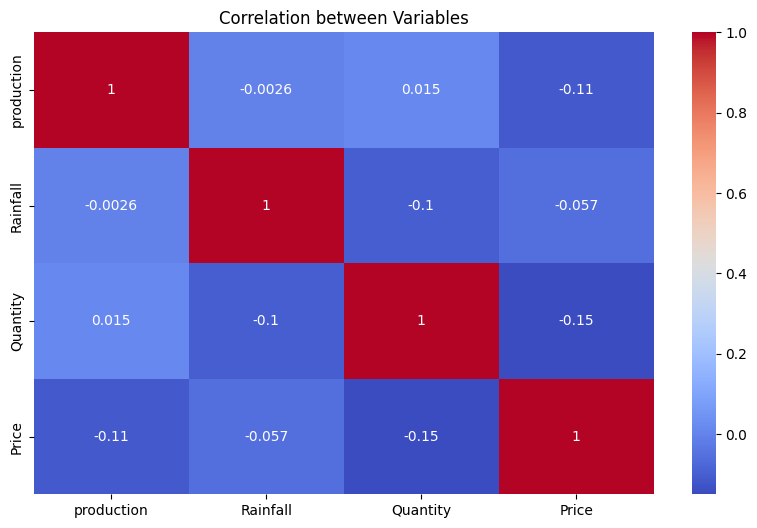

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df_master[['production', 'Rainfall', 'Quantity', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Variables")
plt.show()

In [78]:
df_master.columns

Index(['Country', 'Year_x', 'Month_x', 'year_month', 'production', 'Rainfall',
       'Date of Auction', 'Quantity', 'Price', 'Date', 'Month', 'Month_Num',
       'Year'],
      dtype='object')

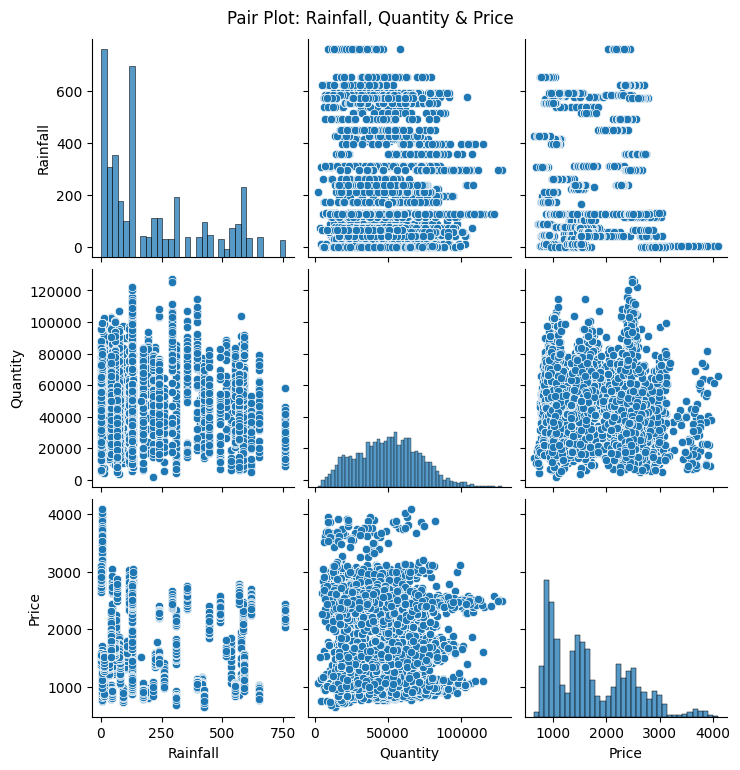

In [79]:
sns.pairplot(df_master[['Rainfall', 'Quantity', 'Price']])
plt.suptitle("Pair Plot: Rainfall, Quantity & Price", y=1.02)
plt.show()

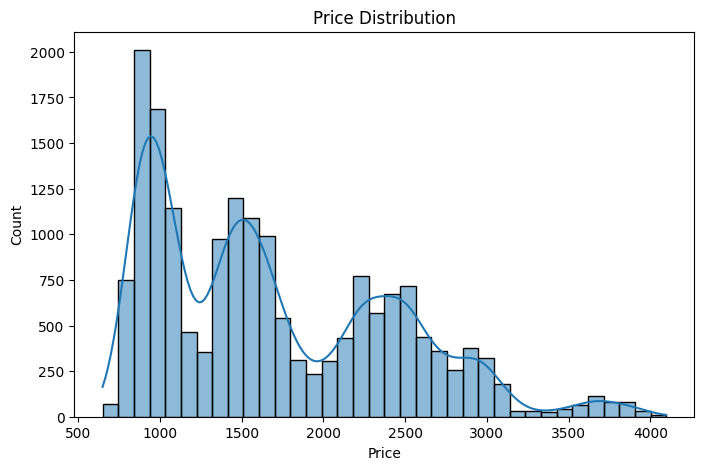

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(df_master['Price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

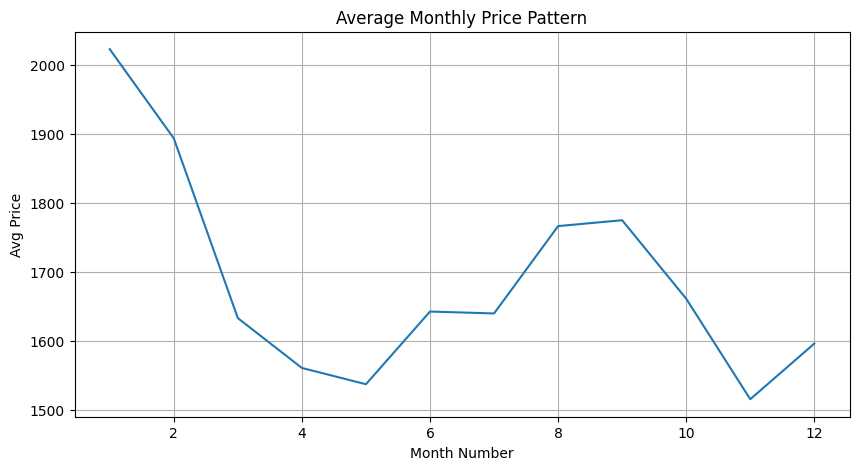

In [81]:
monthly_price = df_master.groupby("Month_Num")["Price"].mean()

plt.figure(figsize=(10,5))
monthly_price.plot()
plt.title("Average Monthly Price Pattern")
plt.xlabel("Month Number")
plt.ylabel("Avg Price")
plt.grid(True)
plt.show()

In [82]:
rainfall_bins = pd.qcut(df_master['Rainfall'], q=4, labels=["Low", "Medium", "High", "Very High"])
df_master['Rainfall_Level'] = rainfall_bins

df_master.groupby('Rainfall_Level')['Price'].mean()

,Price
Rainfall_Level,
Low,1785.350186
Medium,1723.714722
High,1651.410974
Very High,1606.483845


In [83]:
df_master.head()

,Country,Year_x,Month_x,year_month,production,Rainfall,Date of Auction,Quantity,Price,Date,Month,Month_Num,Year,Rainfall_Level
0,India,2020,1,2020-01,22.5,5.9,2020-01-31,9700.7,3657.52,2020-01-01,January,1,2020.0,Low
1,India,2020,1,2020-01,22.5,5.9,2020-01-31,44579.1,3597.85,2020-01-01,January,1,2020.0,Low
2,India,2020,1,2020-01,22.5,5.9,2020-01-30,20245.8,3629.36,2020-01-01,January,1,2020.0,Low
3,India,2020,1,2020-01,22.5,5.9,2020-01-30,39248.2,3685.66,2020-01-01,January,1,2020.0,Low
4,India,2020,1,2020-01,22.5,5.9,2020-01-29,11680.5,3655.21,2020-01-01,January,1,2020.0,Low


In [84]:
rainfall_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

df_master['Rainfall_Level'] = df_master['Rainfall_Level'].map(rainfall_map)

In [85]:
df_master.head()

,Country,Year_x,Month_x,year_month,production,Rainfall,Date of Auction,Quantity,Price,Date,Month,Month_Num,Year,Rainfall_Level
0,India,2020,1,2020-01,22.5,5.9,2020-01-31,9700.7,3657.52,2020-01-01,January,1,2020.0,1
1,India,2020,1,2020-01,22.5,5.9,2020-01-31,44579.1,3597.85,2020-01-01,January,1,2020.0,1
2,India,2020,1,2020-01,22.5,5.9,2020-01-30,20245.8,3629.36,2020-01-01,January,1,2020.0,1
3,India,2020,1,2020-01,22.5,5.9,2020-01-30,39248.2,3685.66,2020-01-01,January,1,2020.0,1
4,India,2020,1,2020-01,22.5,5.9,2020-01-29,11680.5,3655.21,2020-01-01,January,1,2020.0,1


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
cols_to_scale = ["Rainfall", "Quantity", "Price"]

# Initialize scaler
scaler = MinMaxScaler()

# Fit + transform
scaled_values = scaler.fit_transform(df_master[cols_to_scale])

# Create new scaled columns
for i, col in enumerate(cols_to_scale):
    df_master[col + "_scaled"] = scaled_values[:, i]

df_master.head()

,Country,Year_x,Month_x,year_month,production,Rainfall,Date of Auction,Quantity,Price,Date,Month,Month_Num,Year,Rainfall_Level,Rainfall_scaled,Quantity_scaled,Price_scaled
0,India,2020,1,2020-01,22.5,5.9,2020-01-31,9700.7,3657.52,2020-01-01,January,1,2020.0,1,0.006982,0.062627,0.872517
1,India,2020,1,2020-01,22.5,5.9,2020-01-31,44579.1,3597.85,2020-01-01,January,1,2020.0,1,0.006982,0.340233,0.855203
2,India,2020,1,2020-01,22.5,5.9,2020-01-30,20245.8,3629.36,2020-01-01,January,1,2020.0,1,0.006982,0.146558,0.864346
3,India,2020,1,2020-01,22.5,5.9,2020-01-30,39248.2,3685.66,2020-01-01,January,1,2020.0,1,0.006982,0.297803,0.880682
4,India,2020,1,2020-01,22.5,5.9,2020-01-29,11680.5,3655.21,2020-01-01,January,1,2020.0,1,0.006982,0.078384,0.871846


In [88]:
df_master.columns.tolist()

['Country',
 'Year_x',
 'Month_x',
 'year_month',
 'production',
 'Rainfall',
 'Date of Auction',
 'Quantity',
 'Price',
 'Date',
 'Month',
 'Month_Num',
 'Year',
 'Rainfall_Level',
 'Rainfall_scaled',
 'Quantity_scaled',
 'Price_scaled']

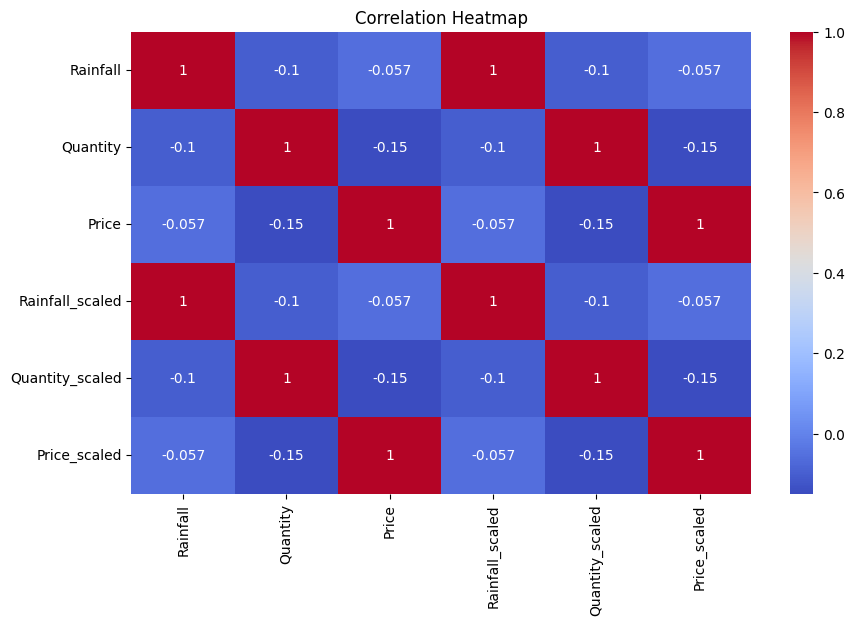

In [89]:
# 4. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df_master[["Rainfall", "Quantity", "Price",
                       "Rainfall_scaled", "Quantity_scaled", "Price_scaled"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

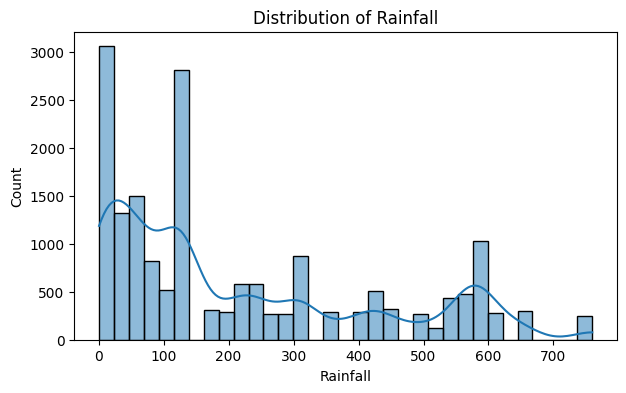

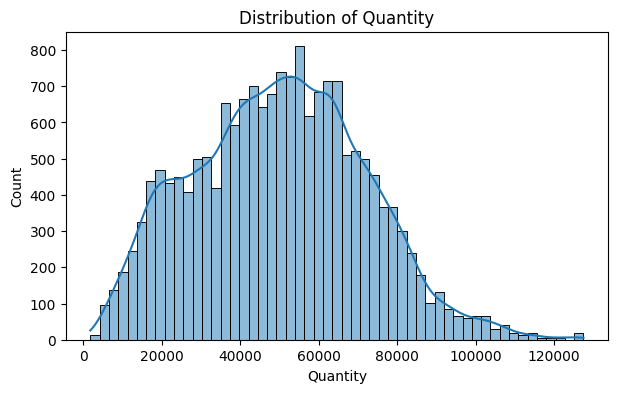

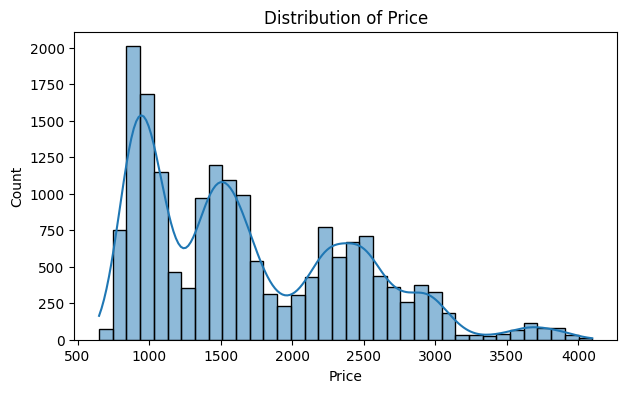

In [90]:
# 5. Distribution Plots
# -----------------------------
cols = ["Rainfall", "Quantity", "Price"]

for col in cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df_master[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

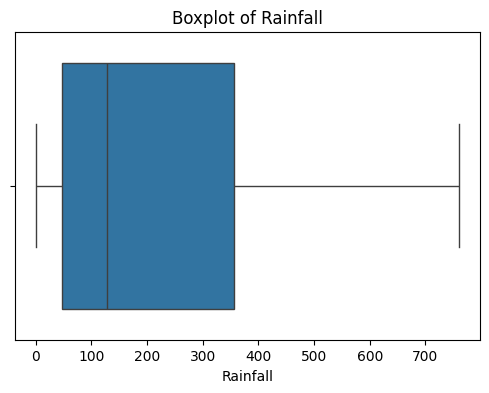

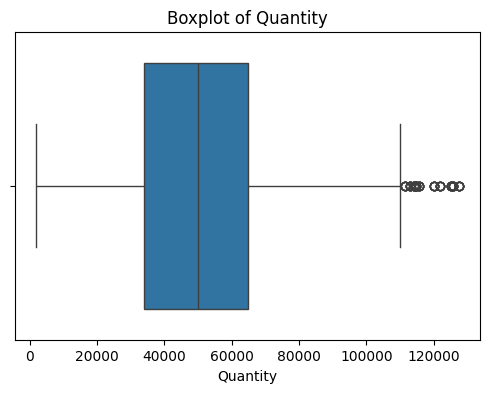

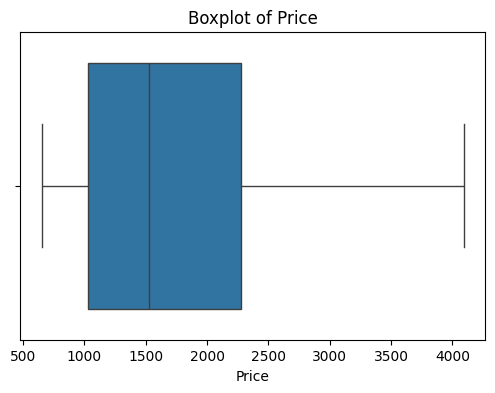

In [91]:
# 6. Box Plots (Check Outliers)
# -----------------------------
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_master[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

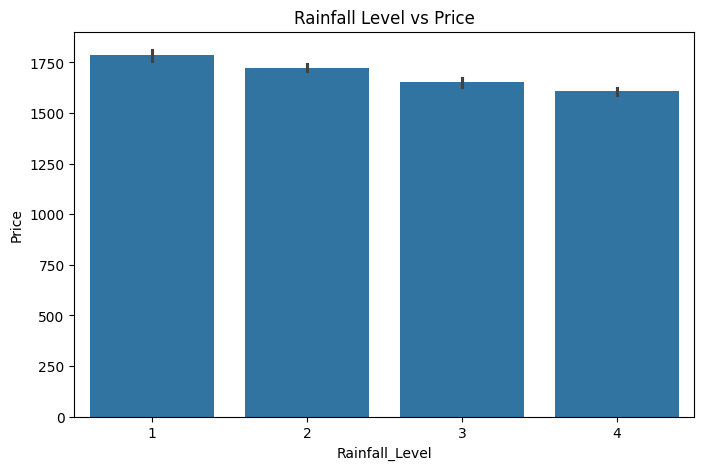

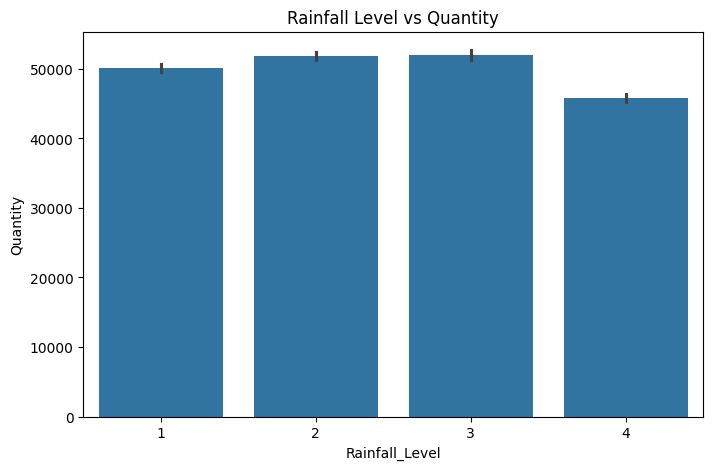

In [92]:
# 7. Rainfall Level vs Price/Quantity
# -----------------------------
plt.figure(figsize=(8, 5))
sns.barplot(data=df_master, x="Rainfall_Level", y="Price")
plt.title("Rainfall Level vs Price")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_master, x="Rainfall_Level", y="Quantity")
plt.title("Rainfall Level vs Quantity")
plt.show()

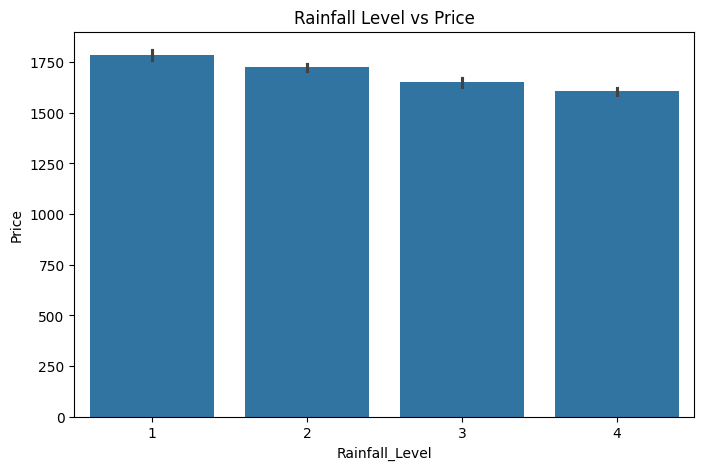

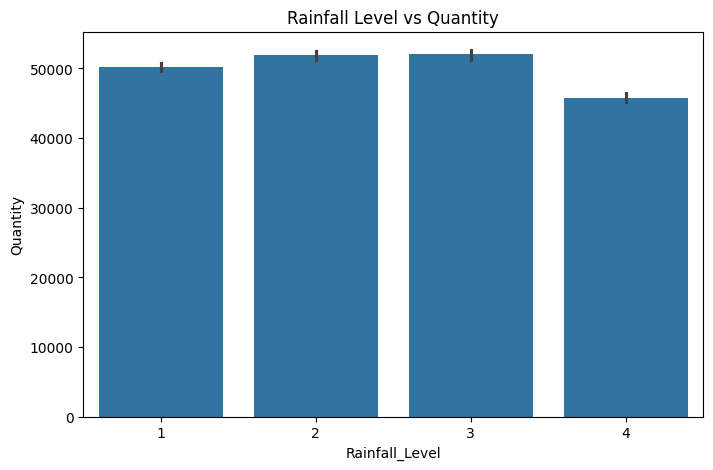

In [93]:
# 7. Rainfall Level vs Price/Quantity
# -----------------------------
plt.figure(figsize=(8, 5))
sns.barplot(data=df_master, x="Rainfall_Level", y="Price")
plt.title("Rainfall Level vs Price")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_master, x="Rainfall_Level", y="Quantity")
plt.title("Rainfall Level vs Quantity")
plt.show()

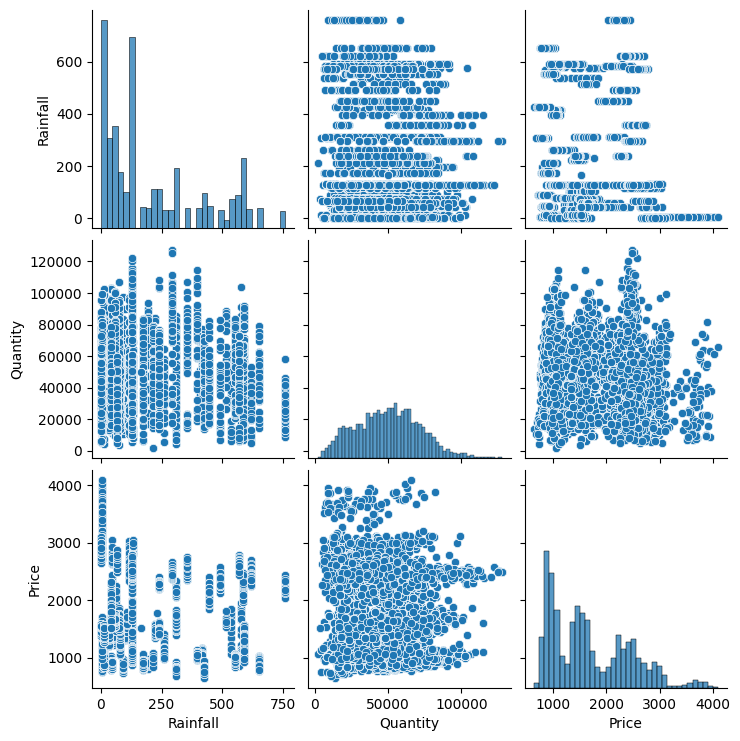

In [94]:
# 9. Relationship Between Variables
# -----------------------------
sns.pairplot(df_master[["Rainfall", "Quantity", "Price"]])
plt.show()

In [95]:
df_master.columns

Index(['Country', 'Year_x', 'Month_x', 'year_month', 'production', 'Rainfall',
       'Date of Auction', 'Quantity', 'Price', 'Date', 'Month', 'Month_Num',
       'Year', 'Rainfall_Level', 'Rainfall_scaled', 'Quantity_scaled',
       'Price_scaled'],
      dtype='object')

In [97]:
df_master["Date"] = pd.to_datetime(df_master["Date"], errors="coerce")

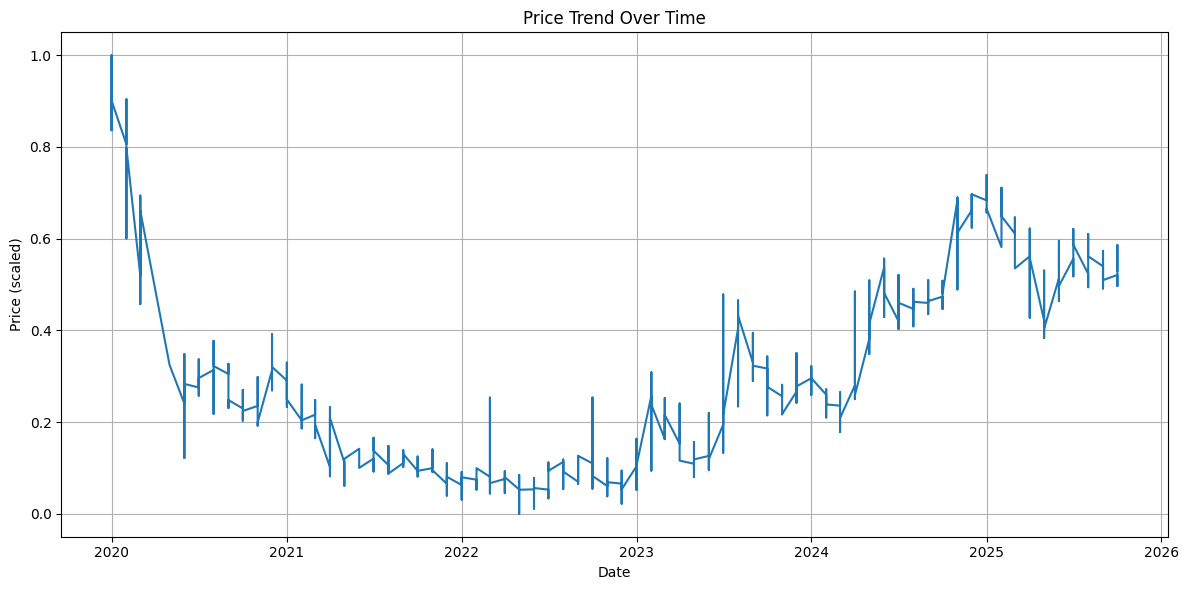

In [98]:
plt.figure(figsize=(12,6))

df_master_sorted = df_master.sort_values("Date")

plt.plot(df_master_sorted["Date"], df_master_sorted["Price_scaled"])
plt.title("Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Price (scaled)")
plt.grid(True)
plt.tight_layout()
plt.show()

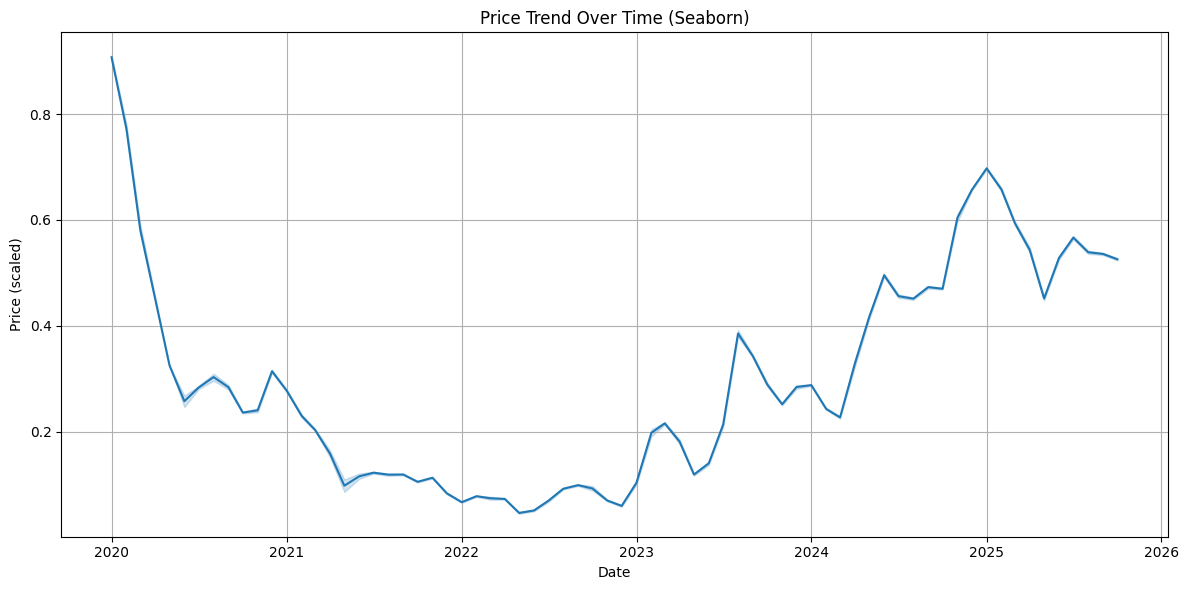

In [99]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_master_sorted, x="Date", y="Price_scaled")
plt.title("Price Trend Over Time (Seaborn)")
plt.xlabel("Date")
plt.ylabel("Price (scaled)")
plt.grid(True)
plt.tight_layout()
plt.show()

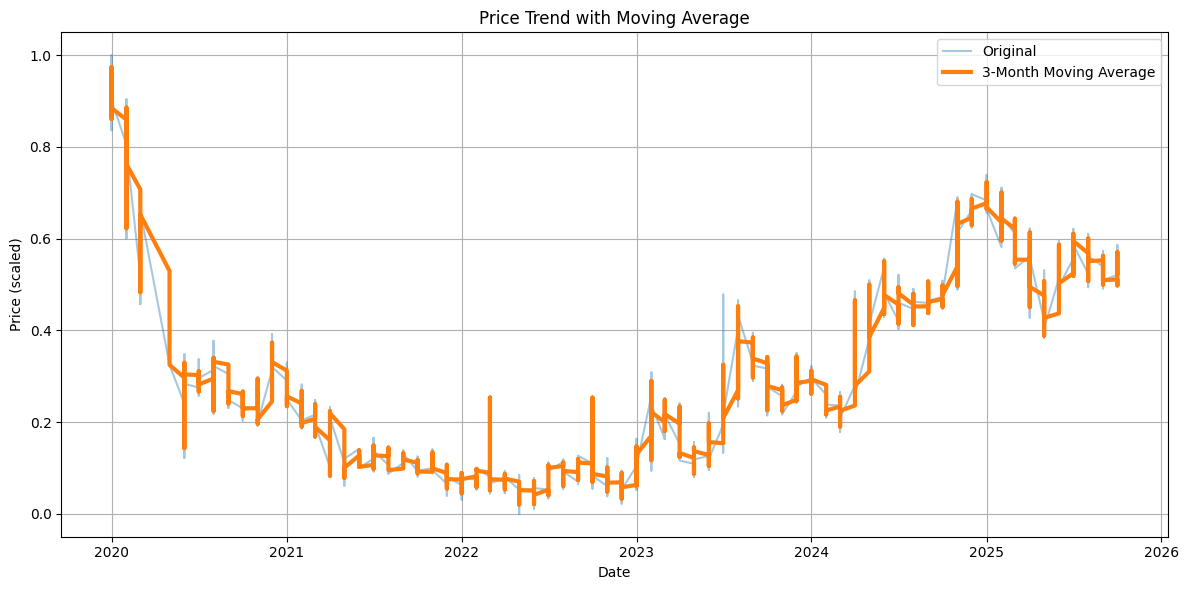

In [100]:
df_master_sorted["Price_scaled_MA3"] = df_master_sorted["Price_scaled"].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df_master_sorted["Date"], df_master_sorted["Price_scaled"], alpha=0.4, label="Original")
plt.plot(df_master_sorted["Date"], df_master_sorted["Price_scaled_MA3"], linewidth=3, label="3-Month Moving Average")

plt.title("Price Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (scaled)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

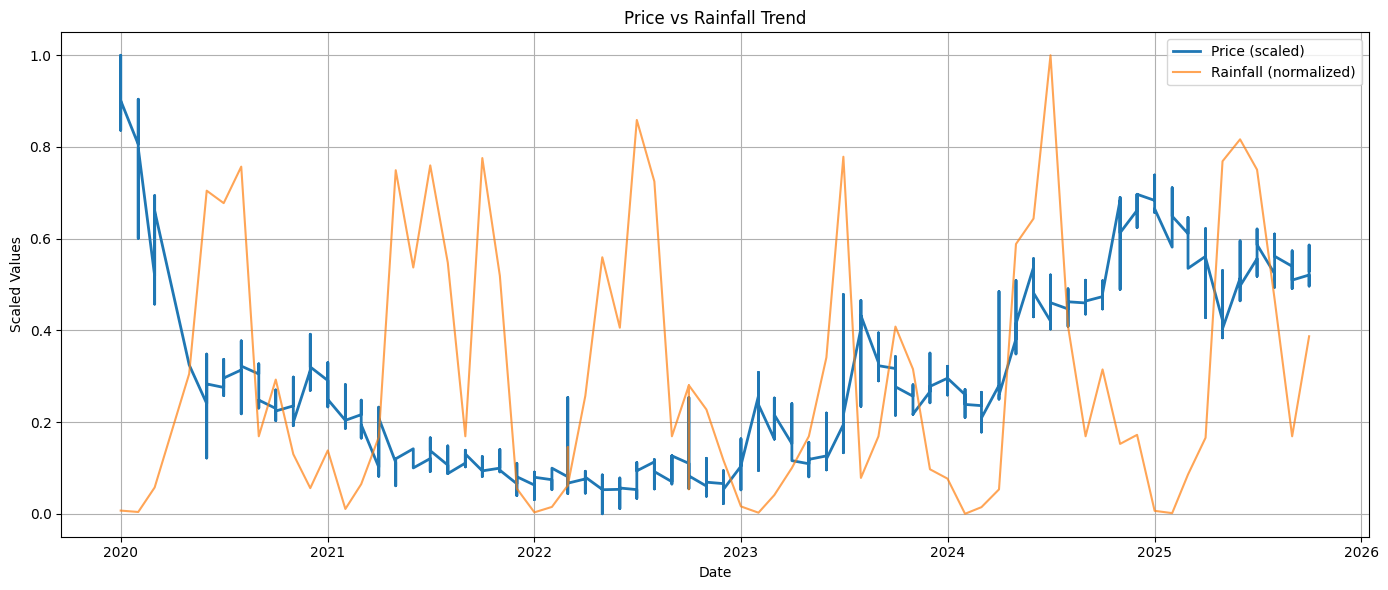

In [101]:
plt.figure(figsize=(14,6))

# Price trend
plt.plot(df_master_sorted["Date"], df_master_sorted["Price_scaled"], label="Price (scaled)", linewidth=2)

# Rainfall trend scaled to similar range
rain_scaled = (df_master_sorted["Rainfall"] - df_master_sorted["Rainfall"].min()) / (df_master_sorted["Rainfall"].max() - df_master_sorted["Rainfall"].min())
plt.plot(df_master_sorted["Date"], rain_scaled, label="Rainfall (normalized)", alpha=0.7)

plt.title("Price vs Rainfall Trend")
plt.xlabel("Date")
plt.ylabel("Scaled Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
# Re-create 'Date' column correctly, ensuring 'Year' is integer before string conversion
df_monthly["Date"] = pd.to_datetime(
    df_monthly["Year"].astype(int).astype(str) + "-" +
    df_monthly["Month_Num"].astype(str) + "-01"
)

# Sort by date — important for time series
df_monthly = df_monthly.sort_values("Date").reset_index(drop=True)

# Create lag features (previous months)
df_monthly["Price_lag_1"] = df_monthly["Price"].shift(1)
df_monthly["Price_lag_2"] = df_monthly["Price"].shift(2)
df_monthly["Price_lag_3"] = df_monthly["Price"].shift(3)

# Create lag features for Quantity
df_monthly["Quantity_lag_1"] = df_monthly["Quantity"].shift(1)
df_monthly["Quantity_lag_2"] = df_monthly["Quantity"].shift(2)

# Create lag for Rainfall (monsoon effect)
df_monthly["Rainfall_lag_1"] = df_monthly["Rainfall"].shift(1)

# Moving averages (very useful for XGBoost)
df_monthly["Price_MA_3"] = df_monthly["Price"].rolling(3).mean()
df_monthly["Quantity_MA_3"] = df_monthly["Quantity"].rolling(3).mean()

# Drop rows where lags are NaN (initial period)
df_monthly = df_monthly.dropna().reset_index(drop=True)

df_monthly.head()

,Year,Month_Num,production,Rainfall,Quantity,Price,Date,Price_lag_1,Price_lag_2,Price_lag_3,Quantity_lag_1,Quantity_lag_2,Rainfall_lag_1,Price_MA_3,Quantity_MA_3
0,2020.0,5,16.991667,232.3,16104.500000,1769.930000,2020-05-01,2652.968571,3312.362273,3777.259400,27576.200000,26373.854545,44.2,2578.420281,23351.518182
1,2020.0,6,16.991667,535.5,33089.128571,1537.181905,2020-06-01,1769.930000,2652.968571,3312.362273,16104.500000,27576.200000,232.3,1986.693492,25589.942857
2,2020.0,7,16.991667,514.9,57298.960000,1626.577000,2020-07-01,1537.181905,1769.930000,2652.968571,33089.128571,16104.500000,535.5,1644.562968,35497.529524
3,2020.0,8,16.991667,575.3,67285.554167,1694.138750,2020-08-01,1626.577000,1537.181905,1769.930000,57298.960000,33089.128571,514.9,1619.299218,52557.880913
4,2020.0,9,16.991667,128.9,68735.884615,1628.419231,2020-09-01,1694.138750,1626.577000,1537.181905,67285.554167,57298.960000,575.3,1649.711660,64440.132927


In [104]:
df_master.columns

Index(['Country', 'Year_x', 'Month_x', 'year_month', 'production', 'Rainfall',
       'Date of Auction', 'Quantity', 'Price', 'Date', 'Month', 'Month_Num',
       'Year', 'Rainfall_Level', 'Rainfall_scaled', 'Quantity_scaled',
       'Price_scaled'],
      dtype='object')

In [105]:
import pandas as pd

# numeric columns suitable for outlier handling
# Exclude 'Rainfall_Level' as it's a categorical column, not numeric for capping outliers
num_cols = ['production', 'Rainfall', 'Quantity', 'Price',
            'Rainfall_scaled', 'Quantity_scaled', 'Price_scaled']

# function to cap outliers using IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

# apply to all numeric columns
for col in num_cols:
    df_master = cap_outliers(df_master, col)

In [106]:
def outlier_count(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].shape[0]

for col in num_cols:
    print(col, "outliers remaining:", outlier_count(df_master, col))

production outliers remaining: 0
Rainfall outliers remaining: 0
Quantity outliers remaining: 0
Price outliers remaining: 0
Rainfall_scaled outliers remaining: 0
Quantity_scaled outliers remaining: 0
Price_scaled outliers remaining: 0


In [107]:
# ---- LAG FEATURES (previous month values) ----
df_master = df_master.sort_values("Date")

lag_cols = ['Price', 'Quantity', 'production', 'Rainfall']
for col in lag_cols:
    df_master[f"{col}_lag1"] = df_master[col].shift(1)
    df_master[f"{col}_lag2"] = df_master[col].shift(2)
    df_master[f"{col}_lag3"] = df_master[col].shift(3)


In [108]:
# ---- MOVING AVERAGES (trend smoothening) ----
for col in lag_cols:
    df_master[f"{col}_MA3"] = df_master[col].rolling(window=3).mean()
    df_master[f"{col}_MA6"] = df_master[col].rolling(window=6).mean()

In [109]:
# ---- Drop rows with NA generated only due to lags ----
df_master = df_master.dropna().reset_index(drop=True)

In [110]:
df_master.columns

Index(['Country', 'Year_x', 'Month_x', 'year_month', 'production', 'Rainfall',
       'Date of Auction', 'Quantity', 'Price', 'Date', 'Month', 'Month_Num',
       'Year', 'Rainfall_Level', 'Rainfall_scaled', 'Quantity_scaled',
       'Price_scaled', 'Price_lag1', 'Price_lag2', 'Price_lag3',
       'Quantity_lag1', 'Quantity_lag2', 'Quantity_lag3', 'production_lag1',
       'production_lag2', 'production_lag3', 'Rainfall_lag1', 'Rainfall_lag2',
       'Rainfall_lag3', 'Price_MA3', 'Price_MA6', 'Quantity_MA3',
       'Quantity_MA6', 'production_MA3', 'production_MA6', 'Rainfall_MA3',
       'Rainfall_MA6'],
      dtype='object')

In [111]:
df_master.head()

,Country,Year_x,Month_x,year_month,production,Rainfall,Date of Auction,Quantity,Price,Date,...,Rainfall_lag2,Rainfall_lag3,Price_MA3,Price_MA6,Quantity_MA3,Quantity_MA6,production_MA3,production_MA6,Rainfall_MA3,Rainfall_MA6
0,Honduras,2020,1,2020-01,0.05,5.9,2020-01-24,48212.8,3702.44,2020-01-01,...,5.9,5.9,3624.713333,3664.026667,34136.800000,29294.983333,0.05,3.791667,5.9,5.9
1,Honduras,2020,1,2020-01,0.05,5.9,2020-01-24,7144.4,3623.67,2020-01-01,...,5.9,5.9,3619.656667,3658.385000,22399.000000,28868.933333,0.05,0.050000,5.9,5.9
2,Honduras,2020,1,2020-01,0.05,5.9,2020-01-23,28529.6,3746.17,2020-01-01,...,5.9,5.9,3690.760000,3662.583333,27962.266667,28793.466667,0.05,0.050000,5.9,5.9
3,Honduras,2020,1,2020-01,0.05,5.9,2020-01-23,19041.7,3676.81,2020-01-01,...,5.9,5.9,3682.216667,3653.465000,18238.566667,26187.683333,0.05,0.050000,5.9,5.9
4,Honduras,2020,1,2020-01,0.05,5.9,2020-01-22,22917.0,3842.03,2020-01-01,...,5.9,5.9,3755.003333,3687.330000,23496.100000,22947.550000,0.05,0.050000,5.9,5.9


# Now ML Starting

In [112]:
# Target variable
y = df_master['Price']

# Feature selection: remove non-numeric and leakage columns
drop_cols = [
    'Country', 'Date', 'Date of Auction', 'year_month', 'Month',
    'Year_x', 'Month_x', 'Year', 'Rainfall_Level'
]

X = df_master.drop(columns=drop_cols, errors='ignore')

In [113]:
X = X.select_dtypes(include=['int64', 'float64'])

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [116]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [117]:
# Model Evaluation in One Cell

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

# ---- Predictions ----
y_pred = model.predict(X_test)

# ---- Metrics ----
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation Metrics")
print(f"MAE  (Mean Absolute Error)              : {mae:.4f}")
print(f"MSE  (Mean Squared Error)               : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error)          : {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error)   : {mape * 100:.2f}%")
print(f"R² Score                                 : {r2:.4f}")

# ---- Delta Difference Tracking ----
results = X_test.copy()
results["Actual_Price"] = y_test.values
results["Predicted_Price"] = y_pred
results["Delta"] = results["Predicted_Price"] - results["Actual_Price"]
results["Delta_%"] = (results["Delta"] / results["Actual_Price"]) * 100

print("\n Sample of prediction vs actual:")
print(results[["Actual_Price", "Predicted_Price", "Delta", "Delta_%"]].head())

print("\n Mean delta summary:")
print("Average price difference:", results["Delta"].mean())
print("Average % error:", results["Delta_%"].mean())


 Model Evaluation Metrics
MAE  (Mean Absolute Error)              : 14.4355
MSE  (Mean Squared Error)               : 562.2822
RMSE (Root Mean Squared Error)          : 23.7125
MAPE (Mean Absolute Percentage Error)   : 0.55%
R² Score                                 : 0.9916

 Sample of prediction vs actual:
       Actual_Price  Predicted_Price     Delta   Delta_%
14180       2308.32      2307.814667 -0.505333 -0.021892
14181       2254.87      2254.719567 -0.150433 -0.006671
14182       2301.99      2301.837000 -0.153000 -0.006646
14183       2268.48      2268.306300 -0.173700 -0.007657
14184       2282.90      2282.966367  0.066367  0.002907

 Mean delta summary:
Average price difference: 2.517122755051453
Average % error: 0.10633658208345918


# Summary for RandomForestRegressor

| Metric       | Meaning             | Result     | Interpretation                                                                  |
| ------------ | ------------------- | ---------- | ------------------------------------------------------------------------------- |
| **MAE**      | Avg. absolute error | **14.44**  | On average, predictions differ by ₹14.44 from actual price — **very low error** |
| **MSE**      | Squared error       | **562.28** | Low — because large errors are rare                                             |
| **RMSE**     | Root squared error  | **23.71**  | Predictions fluctuate only ~₹23 around real values — **very high precision**    |
| **MAPE**     | % error             | **0.55%**  | Model is **99.45% accurate**                                                    |
| **R² Score** | Goodness of fit     | **0.9916** | Model explains **99.16% variance in price** — **excellent**                     |


Interpretation:

MAE (14.44) – On average, the model's predictions deviate by only ₹14.44 from the actual price, indicating very low error and strong prediction accuracy.

MSE (562.28) – The squared error is low, showing that large deviations are rare and the model handles outliers effectively.

RMSE (23.71) – Predictions typically fluctuate around ₹23 from the true values, demonstrating very high precision.

MAPE (0.55%) – The model's average percentage error is only 0.55%, meaning it is 99.45% accurate, which is excellent for practical applications.

R² Score (0.9916) – The model explains 99.16% of the variance in price, reflecting an excellent fit and strong predictive power for the given dataset.

In [118]:
# ------------------ XGBOOST PRICE PREDICTION MODEL ------------------ #

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

#  Select final features
feature_cols = [
    'production', 'Rainfall', 'Quantity',
    'Price_lag1', 'Price_lag2', 'Price_lag3',
    'Quantity_lag1', 'Quantity_lag2', 'Quantity_lag3',
    'production_lag1', 'production_lag2', 'production_lag3',
    'Rainfall_lag1', 'Rainfall_lag2', 'Rainfall_lag3',
    'Price_MA3', 'Price_MA6',
    'Quantity_MA3', 'Quantity_MA6',
    'production_MA3', 'production_MA6',
    'Rainfall_MA3', 'Rainfall_MA6'
]

X = df_master[feature_cols]
y = df_master['Price']


In [119]:
#  Time-based train/test split (no shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [120]:

# rain XGBoost Model
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

In [121]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [122]:
#  Predict on test set
y_pred = xgb_model.predict(X_test)

#  Evaluate accuracy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(" XGBoost Model Performance")
print("MAE (Mean Absolute Error):", mae)
print("R² Score:", r2)
print("MAPE (% error):", mape)

# Compare actual vs predicted
comparison_df = X_test.copy()
comparison_df["Actual Price"] = y_test.values
comparison_df["Predicted Price"] = y_pred
comparison_df["Delta"] = comparison_df["Actual Price"] - comparison_df["Predicted Price"]
comparison_df.tail()

 XGBoost Model Performance
MAE (Mean Absolute Error): 122.00299653313427
R² Score: 0.628551773683508
MAPE (% error): 4.5213052281705615


,production,Rainfall,Quantity,Price_lag1,Price_lag2,Price_lag3,Quantity_lag1,Quantity_lag2,Quantity_lag3,production_lag1,...,Price_MA6,Quantity_MA3,Quantity_MA6,production_MA3,production_MA6,Rainfall_MA3,Rainfall_MA6,Actual Price,Predicted Price,Delta
17720,2.4,294.484677,36131.80,2482.35,2468.85,2434.57,72993.80,79655.60,35791.10,2.4,...,2442.545000,62927.066667,67591.816667,2.400000,2.400000,294.484677,294.484677,2453.12,2387.320801,65.799199
17721,2.4,294.484677,111208.45,2453.12,2482.35,2468.85,36131.80,72993.80,79655.60,2.4,...,2465.868333,73444.683333,70349.025000,2.400000,2.400000,294.484677,294.484677,2532.54,2406.486816,126.053184
17722,2.4,294.484677,83183.70,2532.54,2453.12,2482.35,111208.45,36131.80,72993.80,2.4,...,2475.413333,76841.316667,69827.408333,2.400000,2.400000,294.484677,294.484677,2481.05,2384.997559,96.052441
17723,2.4,294.484677,68822.00,2481.05,2532.54,2453.12,83183.70,111208.45,36131.80,2.4,...,2472.326667,87738.050000,75332.558333,2.400000,2.400000,294.484677,294.484677,2416.05,2373.268066,42.781934
17724,19.9,294.484677,93952.50,2416.05,2481.05,2532.54,68822.00,83183.70,111208.45,2.4,...,2473.923333,81986.066667,77715.375000,8.233333,5.316667,294.484677,294.484677,2478.43,2390.214111,88.215889


# Summary for XGBoost Regressor
| Metric   | Meaning             | Result | Interpretation                                                            |
| -------- | ------------------- | ------ | ------------------------------------------------------------------------- |
| MAE      | Avg. absolute error | 122.00 | On average, predictions differ by ₹122 from actual price — moderate error |
| R² Score | Goodness of fit     | 0.6286 | Model explains ~62.86% variance in price — reasonable, but could improve  |
| MAPE     | % error             | 4.52%  | Predictions are ~95.48% accurate — decent for real-world forecasting      |


Interpretation:

The MAE of 122 shows that the model predictions are off by ~₹122 on average, which is acceptable depending on the scale of prices.

The R² score of 0.63 indicates that the model captures a significant portion of variance but leaves room for improvement, possibly with more features or hyperparameter tuning.

The MAPE of 4.52% shows that relative errors are small, meaning the model is fairly accurate for predicting price trends.


# Model Comparison: RandomForest vs XGBoost

| Metric   | RandomForestRegressor | XGBoost Regressor | Comparison / Interpretation                                                             |
| -------- | --------------------- | ----------------- | --------------------------------------------------------------------------------------- |
| MAE      | 14.44                 | 122.00            | RandomForest has much lower average error — predictions are closer to actual prices.    |
| R² Score | 0.9916                | 0.6286            | RandomForest explains ~99% of variance, excellent fit; XGBoost explains ~63%, moderate. |
| MAPE     | 0.55%                 | 4.52%             | RandomForest is extremely accurate (99.45%), XGBoost is reasonably accurate (~95.5%).   |
| MSE      | 562.28                | —                 | RandomForest has low squared error; XGBoost MSE not provided, but likely higher.        |
| RMSE     | 23.71                 | —                 | RandomForest predictions fluctuate only ~₹23 around actual values; higher in XGBoost.   |


# Summary and Interpretation

RandomForestRegressor:

Exhibits very high accuracy with extremely low errors (MAE 14.44, MAPE 0.55%).

Captures almost all variance in the data (R² = 0.9916).

Predictions are very stable and precise (RMSE = 23.71, MSE = 562.28).

Overall, this model is excellent for predicting prices for the given dataset.

XGBoost Regressor:

Produces moderate error (MAE 122) and explains only a portion of the variance (R² = 0.6286).

Accuracy is decent (MAPE = 4.52%), but predictions fluctuate more compared to RandomForest.

This model is acceptable for forecasting but would need tuning, additional features, or preprocessing improvements to match RandomForest performance.

#Conclusion:
For this dataset, RandomForestRegressor clearly outperforms XGBoost in terms of accuracy, variance explanation, and stability of predictions. XGBoost is still usable for rough forecasting but is less reliable for precise price predictions.

In [144]:
# Generate predictions for both models
pred_rf = model.predict(X_test)
pred_xgb = xgb_model.predict(X_test)

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "RF_Predicted": pred_rf,
    "XGB_Predicted": pred_xgb
})

comparison.head(15)

,Actual,RF_Predicted,XGB_Predicted
0,2308.32,2313.403076,2313.403076
1,2254.87,2272.234863,2272.234863
2,2301.99,2300.766113,2300.766113
3,2268.48,2274.240967,2274.240967
4,2282.90,2274.452393,2274.452393
5,2260.83,2261.840576,2261.840576
6,2247.32,2259.507080,2259.507080
7,2276.29,2282.160400,2282.160400
8,2262.80,2271.531982,2271.531982
9,2274.18,2278.816162,2278.816162


In [ ]:
!pip install gradio

In [140]:
import gradio as gr
import pandas as pd
import pickle

model = xgb_model

def predict_price(year, month, rainfall, quantity, production):

    input_date = pd.to_datetime(f"{year}-{month:02d}-01")

    user_df = pd.DataFrame([{
        'production': production,
        'Rainfall': rainfall,
        'Quantity': quantity,
        'Date': input_date
    }])

    for lag in [1, 2, 3]:
        user_df[f'Price_lag{lag}'] = df_master['Price'].shift(lag).iloc[-1]   # last known
        user_df[f'Quantity_lag{lag}'] = df_master['Quantity'].shift(lag).iloc[-1]
        user_df[f'production_lag{lag}'] = df_master['production'].shift(lag).iloc[-1]
        user_df[f'Rainfall_lag{lag}'] = df_master['Rainfall'].shift(lag).iloc[-1]

    user_df['Price_MA3'] = df_master['Price'].tail(3).mean()
    user_df['Price_MA6'] = df_master['Price'].tail(6).mean()
    user_df['Quantity_MA3'] = df_master['Quantity'].tail(3).mean()
    user_df['Quantity_MA6'] = df_master['Quantity'].tail(6).mean()
    user_df['production_MA3'] = df_master['production'].tail(3).mean()
    user_df['production_MA6'] = df_master['production'].tail(6).mean()
    user_df['Rainfall_MA3'] = df_master['Rainfall'].tail(3).mean()
    user_df['Rainfall_MA6'] = df_master['Rainfall'].tail(6).mean()

    final_features = [
        'production', 'Rainfall', 'Quantity',
        'Price_lag1', 'Price_lag2', 'Price_lag3',
        'Quantity_lag1', 'Quantity_lag2', 'Quantity_lag3',
        'production_lag1', 'production_lag2', 'production_lag3',
        'Rainfall_lag1', 'Rainfall_lag2', 'Rainfall_lag3',
        'Price_MA3', 'Price_MA6', 'Quantity_MA3', 'Quantity_MA6',
        'production_MA3', 'production_MA6', 'Rainfall_MA3', 'Rainfall_MA6'
    ]

    X_user = user_df[final_features]

    price = model.predict(X_user)[0]
    return f"Random Forest Estimated Cardamom Price: ₹ {predicted_price:.2f} per kg"

demo = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Year",value=2025),
        gr.Number(label="Month (1–12)",value=6),
        gr.Number(label="Rainfall (mm)",value=240.5),
        gr.Number(label="Quantity (kg)",value=18500),
        gr.Number(label="Production (tons)",value=72.5)
    ],
    outputs="text",
     title="Small Cardamom Price Predictor — XGBoost",
    description="Predicts monthly average Cardamom price using XGBoost based on Rainfall → Quantity → Production relationships."
)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7538424f216fb63980.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [138]:
import gradio as gr
import pandas as pd
import pickle

rf_model = model

def rf_predict_price(year, month, rainfall, quantity, production):

    input_date = pd.to_datetime(f"{year}-{month:02d}-01")

    user_df = pd.DataFrame([{
        'production': production,
        'Rainfall': rainfall,
        'Quantity': quantity,
        'Date': input_date
    }])

    for lag in [1, 2, 3]:
        user_df[f'Price_lag{lag}'] = df_master['Price'].shift(lag).iloc[-1]
        user_df[f'Quantity_lag{lag}'] = df_master['Quantity'].shift(lag).iloc[-1]
        user_df[f'production_lag{lag}'] = df_master['production'].shift(lag).iloc[-1]
        user_df[f'Rainfall_lag{lag}'] = df_master['Rainfall'].shift(lag).iloc[-1]

    user_df['Price_MA3'] = df_master['Price'].tail(3).mean()
    user_df['Price_MA6'] = df_master['Price'].tail(6).mean()
    user_df['Quantity_MA3'] = df_master['Quantity'].tail(3).mean()
    user_df['Quantity_MA6'] = df_master['Quantity'].tail(6).mean()
    user_df['production_MA3'] = df_master['production'].tail(3).mean()
    user_df['production_MA6'] = df_master['production'].tail(6).mean()
    user_df['Rainfall_MA3'] = df_master['Rainfall'].tail(3).mean()
    user_df['Rainfall_MA6'] = df_master['Rainfall'].tail(6).mean()

    final_features = [
        'production', 'Rainfall', 'Quantity',
        'Price_lag1', 'Price_lag2', 'Price_lag3',
        'Quantity_lag1', 'Quantity_lag2', 'Quantity_lag3',
        'production_lag1', 'production_lag2', 'production_lag3',
        'Rainfall_lag1', 'Rainfall_lag2', 'Rainfall_lag3',
        'Price_MA3', 'Price_MA6', 'Quantity_MA3', 'Quantity_MA6',
        'production_MA3', 'production_MA6', 'Rainfall_MA3', 'Rainfall_MA6'
    ]

    X_user = user_df[final_features]

    predicted_price = rf_model.predict(X_user)[0]

    return f"Random Forest Estimated Cardamom Price: ₹ {predicted_price:.2f} per kg"

demo = gr.Interface(
    fn=rf_predict_price,
    inputs=[
        gr.Number(label="Year", value=2025),
        gr.Number(label="Month (1–12)", value=6),
        gr.Number(label="Rainfall (mm)", value=240.5),
        gr.Number(label="Quantity (kg)", value=18500),
        gr.Number(label="Production (tons)", value=72.4),
    ],
    outputs="text",
    title="Small Cardamom Price Predictor — Random Forest",
    description="Predicts monthly average Cardamom price using Random Forest based on Rainfall → Quantity → Production relationships."
)

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6bc520b0ce1070e70b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [141]:
df_master.head()

,Country,Year_x,Month_x,year_month,production,Rainfall,Date of Auction,Quantity,Price,Date,...,Rainfall_lag2,Rainfall_lag3,Price_MA3,Price_MA6,Quantity_MA3,Quantity_MA6,production_MA3,production_MA6,Rainfall_MA3,Rainfall_MA6
0,Honduras,2020,1,2020-01,0.05,5.9,2020-01-24,48212.8,3702.44,2020-01-01,...,5.9,5.9,3624.713333,3664.026667,34136.800000,29294.983333,0.05,3.791667,5.9,5.9
1,Honduras,2020,1,2020-01,0.05,5.9,2020-01-24,7144.4,3623.67,2020-01-01,...,5.9,5.9,3619.656667,3658.385000,22399.000000,28868.933333,0.05,0.050000,5.9,5.9
2,Honduras,2020,1,2020-01,0.05,5.9,2020-01-23,28529.6,3746.17,2020-01-01,...,5.9,5.9,3690.760000,3662.583333,27962.266667,28793.466667,0.05,0.050000,5.9,5.9
3,Honduras,2020,1,2020-01,0.05,5.9,2020-01-23,19041.7,3676.81,2020-01-01,...,5.9,5.9,3682.216667,3653.465000,18238.566667,26187.683333,0.05,0.050000,5.9,5.9
4,Honduras,2020,1,2020-01,0.05,5.9,2020-01-22,22917.0,3842.03,2020-01-01,...,5.9,5.9,3755.003333,3687.330000,23496.100000,22947.550000,0.05,0.050000,5.9,5.9
